# Overview/goals
This project showcases how *puboracle* can be used to mine PubMed and extract info on geospatial location of research activity, networks of collaborations and related matrics.

This example tracks publications with the key word "connectome" or "connectomics" in the last year and dispays key geospatial data and metrics related to these publications.

In [1]:
import math
from pathlib import Path
import re

from puboracle.writestoredata import getdata,readwritefun
from puboracle.txtprocess import txt2geo
from puboracle.visualization import visfun
from puboracle.metrics import txtmetrics

Submit query and fetch data in an XML format

In [2]:
save_folder = '/Users/alexandrosgoulas/Data/example_puboracle_connectomics/xmldata/'
query = 'connectomics OR connectome'
days = 365
email = 'arimpos@gmail.com'

getdata.fetch_write_data(
                        query = query,
                        datetype = 'pdat',
                        email = email,
                        days = days,
                        save_folder = save_folder
                        )


Batch nr...: 0

Submitting query...

Getting data...

Batch nr...: 1

Submitting query...

Getting data...

Could not get data after attempt nr... 1

Retrying...

Could not get data after attempt nr... 2

Retrying...

Could not get data after attempt nr... 3

Retrying...

Could not get data after attempt nr... 4

Retrying...

Could not get data after attempt nr... 5

Retrying...

Could not get data after attempt nr... 6

Retrying...

Could not get data after attempt nr... 7

Retrying...

Could not get data after attempt nr... 8

Retrying...

Could not get data after attempt nr... 9

Retrying...


Read all the XML files that were downloaded

In [3]:
folder_to_xmls = Path('/Users/alexandrosgoulas/Data/work-stuff/projects/example_puboracle_connectomics/xmldata/')
all_xml_files = readwritefun.get_files_in_folder(folder_to_xmls, 
                                                order = True
                                                )

Read the XML files and extract the desired info specified by the list keys_to_parse

In [4]:
keys_to_parse = [
                 'affiliations'
                ]

pub_data, xml_filenames = readwritefun.read_xml_to_dict(folder_to_xmls, 
                                                        all_xml_files = all_xml_files,
                                                        keys_to_parse = keys_to_parse
                                                        )


Iterating file...: xml_0.xml


Extract affiliations

In [5]:
affiliations = pub_data[keys_to_parse.index('affiliations')]

Get unique affiliations - each affiliation consists of multiple affiliations that are colon-seperated

In [6]:
(all_affiliations, 
 _, 
 _) = txtmetrics.get_unique_strs(affiliations, 
                                 exclude=['', ' '] 
                                )

Remove unwanted elements from affiliations:
i.  email address 
ii. author names or initials in parentheses (can also remove acronyms of location but this is OK)   
iii. the word "and" from the beginning of an affiliation 

In [7]:
all_affiliations_cleaned = []
indexes_empty = []
for i,affil in enumerate(all_affiliations):
    cleaned = re.sub("[\(\[].*?[\)\]]", "", affil)#remove text in parentheses
    cleaned = re.sub("\S*@\S*\s?", "", cleaned).rstrip()#remove email address
    cleaned = cleaned.replace('electronic address:','')# remove 'electronic address:'
    cleaned = cleaned.replace('Electronic address:','')# remove 'Electronic address:'
    cleaned = re.sub("^\sand", "", cleaned)# remove 'and' from the beggining (preceeded by whitespace)
    if not cleaned:
        indexes_empty.append(i)
    else:    
        all_affiliations_cleaned.append(cleaned)

Re-assemble the affiliation lists by removing the empty str positions so
that we have a 1-to-1 correspondance of cleaned and uncleaned affiliations 

In [8]:
all_affiliations = [item for i,item in enumerate(all_affiliations) if i not in indexes_empty] 

Get all the unique cleaned affiliations

In [9]:
(all_affiliations_cleaned, 
 unique_affiliations_cleaned, 
 occurences) = txtmetrics.get_unique_strs(all_affiliations_cleaned)

Geolocation: extract latitude and longitude from the textual description of the locations in each affiliation

In [10]:
lat,lon,txtforloc = txt2geo.get_lat_lon_from_text_wordwise(
                                                           unique_affiliations_cleaned,
                                                           reverse = False
                                                           )


Unpacking textual location descriptions...: 1 / 4264

Searching for latitude and longitude for location description: Program in Nano Science and Technology, Graduate School of Convergence Science and Technology, Seoul National University, Seoul, South Korea.

Unpacking textual location descriptions...: 2 / 4264

Searching for latitude and longitude for location description:  Wellcome Centre for Integrative Neuroimaging, University of Oxford, Oxford, OX3 9DU, UK.

Unpacking textual location descriptions...: 3 / 4264

Searching for latitude and longitude for location description: School of Biomedical Engineering, Faculty of Electronic Information and Electrical Engineering, Dalian University of Technology, Dalian 116024, China

Unpacking textual location descriptions...: 4 / 4264

Searching for latitude and longitude for location description: Department of Radiology, University Hospital of Cagliari, Cagliari, Italy.

Unpacking textual location descriptions...: 5 / 4264

Searching for la


Unpacking textual location descriptions...: 38 / 4264

Searching for latitude and longitude for location description: Department of Radiology and BRIC, University of North Carolina at Chapel Hill, Chapel Hill, North Carolina, USA.

Unpacking textual location descriptions...: 39 / 4264

Searching for latitude and longitude for location description: Sorbonne University, GRC n° 21, Alzheimer Precision Medicine , AP-HP, Pitié-Salpêtrière Hospital, Boulevard de l'hôpital, Paris, France

Unpacking textual location descriptions...: 40 / 4264

Searching for latitude and longitude for location description:  Department of Organismal Biology and Anatomy, University of Chicago, Chicago, IL 60637, USA

Unpacking textual location descriptions...: 41 / 4264

Searching for latitude and longitude for location description:  Institute of Clinical Medicine, Aarhus University, Denmark

Unpacking textual location descriptions...: 42 / 4264

Searching for latitude and longitude for location description: Ams


Unpacking textual location descriptions...: 74 / 4264

Searching for latitude and longitude for location description:  Department of Psychiatry, Massachusetts General Hospital, Boston, Massachusetts.

Unpacking textual location descriptions...: 75 / 4264

Searching for latitude and longitude for location description:  Department of Psychiatry, University of Western Ontario, London, ON, Canada

Unpacking textual location descriptions...: 76 / 4264

Searching for latitude and longitude for location description: Singapore Bioimaging Consortium, Agency for Science, Technology and Research, 11 Biopolis Way, 138667, Singapore. 

Unpacking textual location descriptions...: 77 / 4264

Searching for latitude and longitude for location description: Shenzhen Key Lab of Neuropsychiatric Modulation, Guangdong Provincial Key Laboratory of Brain Connectome and Behavior, CAS Key Laboratory of Brain Connectome and Manipulation, CAS Center for Excellence in Brain Science and Intelligence Technology, Th


Unpacking textual location descriptions...: 110 / 4264

Searching for latitude and longitude for location description:  Grossman Institute for Neuroscience, Quantitative Biology and Human Behavior, University of Chicago, Chicago, IL 60637, USA.

Unpacking textual location descriptions...: 111 / 4264

Searching for latitude and longitude for location description: Department of Clinical Neurosciences, Division of Neurology, Geneva University Hospitals and Faculty of Medicine, University of Geneva, Geneva, Switzerland

Unpacking textual location descriptions...: 112 / 4264

Searching for latitude and longitude for location description: Beijing Engineering Research Center of Mixed Reality and Advanced Display, School of Optics and Electronics, Beijing Institute of Technology, Beijing, 100081, China.

Unpacking textual location descriptions...: 113 / 4264

Searching for latitude and longitude for location description: Imaging Genetics Center, Stevens Neuroimaging and Informatics Institute,


Unpacking textual location descriptions...: 147 / 4264

Searching for latitude and longitude for location description: Hospital Clínico San Carlos, Neurosurgery Department, Universidad Complutense de Madrid, Madrid, Spain.

Unpacking textual location descriptions...: 148 / 4264

Searching for latitude and longitude for location description:  Institute of Military Cognition and Brain Sciences, Academy of Military Medical Sciences, Beijing 100850, China.

Unpacking textual location descriptions...: 149 / 4264

Searching for latitude and longitude for location description: Department of Psychiatry and Behavioral Sciences, Rush University Medical Center, 1645 W. Jackson Boulevard, Suite 400, Chicago, IL, 60612, USA.

Unpacking textual location descriptions...: 150 / 4264

Searching for latitude and longitude for location description:  Department of Psychiatry, Yale University School of Medicine, 300 George Street, New Haven, CT 06511, USA

Unpacking textual location descriptions...: 151 /


Unpacking textual location descriptions...: 183 / 4264

Searching for latitude and longitude for location description: IRCCS Stella Maris, Viale del Tirreno, 331, Pisa, Italy.

Unpacking textual location descriptions...: 184 / 4264

Searching for latitude and longitude for location description: Department of Psychiatry, Brain Center University Medical Center Utrecht, Utrecht University, The Netherlands.

Unpacking textual location descriptions...: 185 / 4264

Searching for latitude and longitude for location description: Shenzhen University General Hospital, Department of Rehabilitation Medicine, Shenzhen 518055, China. 

Unpacking textual location descriptions...: 186 / 4264

Searching for latitude and longitude for location description: Department of Neurology, BG University Clinic Bergmannshell, Ruhr-University Bochum, Germany

Unpacking textual location descriptions...: 187 / 4264

Searching for latitude and longitude for location description: Groupe d'imagerie Neurofonctionnelle-


Unpacking textual location descriptions...: 220 / 4264

Searching for latitude and longitude for location description: School of Public Affairs and Administration, University of Electronic Science and Technology of China, Chengdu, 611731, China.

Unpacking textual location descriptions...: 221 / 4264

Searching for latitude and longitude for location description:  Department of Clinical Neurosciences, University of Cambridge, Cambridge, UK. 

Unpacking textual location descriptions...: 222 / 4264

Searching for latitude and longitude for location description: Courant Institute, Center for Data Science and Center for Neural Science, New York University and Facebook AI Research, New York, NY, USA.

Unpacking textual location descriptions...: 223 / 4264

Searching for latitude and longitude for location description: Department of Psychiatric-Neuroimaging-Genetics and Morbidity Laboratory , Tianjin Mental Health Center, Nankai University Affiliated Anding Hospital, Tianjin, 300222, China.


Unpacking textual location descriptions...: 257 / 4264

Searching for latitude and longitude for location description: University of Miami.

Unpacking textual location descriptions...: 258 / 4264

Searching for latitude and longitude for location description:  Neuroscience Graduate Program, University of Michigan, Ann Arbor, MI, USA. 

Unpacking textual location descriptions...: 259 / 4264

Searching for latitude and longitude for location description: Athinoula A. Martinos Center for Biomedical Imaging, Department of Radiology, Massachusetts General Hospital and Harvard Medical School, Boston, MA, USA.

Unpacking textual location descriptions...: 260 / 4264

Searching for latitude and longitude for location description: Department of Pathology and Shanxi Key Laboratory of Carcinogenesis and Translational Research on Esophageal Cancer, Shanxi Medical University, Taiyuan, Shanxi, China.

Unpacking textual location descriptions...: 261 / 4264

Searching for latitude and longitude for lo


Unpacking textual location descriptions...: 294 / 4264

Searching for latitude and longitude for location description: Montreal Neurological Institute, McGill University, Montreal, H3A 2B4, Canada. 

Unpacking textual location descriptions...: 295 / 4264

Searching for latitude and longitude for location description: Edmond and Lily Safra Center for Brain Sciences, The Hebrew University, Jerusalem, Israel.

Unpacking textual location descriptions...: 296 / 4264

Searching for latitude and longitude for location description: Lab Alzheimer's Neuroimaging and Epidemiology, IRCCS Istituto Centro San Giovanni di Dio Fatebenefratelli, Brescia, Italy.

Unpacking textual location descriptions...: 297 / 4264

Searching for latitude and longitude for location description:  St Vincent's Mental Health, St Vincent's Hospital, 41 Victoria Parade, Fitzroy, Melbourne VIC 3065, Australia.

Unpacking textual location descriptions...: 298 / 4264

Searching for latitude and longitude for location descrip


Unpacking textual location descriptions...: 333 / 4264

Searching for latitude and longitude for location description:  UNLV Department of Brain Health , School of Integrated Health Sciences, Las Vegas, NV

Unpacking textual location descriptions...: 334 / 4264

Searching for latitude and longitude for location description: Berenson-Allen Center for Noninvasive Brain Stimulation, Beth Israel Deaconess Medical Center, Boston, MA.

Unpacking textual location descriptions...: 335 / 4264

Searching for latitude and longitude for location description: Center for Health Sciences, SRI International, 333 Ravenswood Avenue, Menlo Park, CA, 94025, USA.

Unpacking textual location descriptions...: 336 / 4264

Searching for latitude and longitude for location description: Department of Medical Information Engineering, School of Electrical Engineering and Information, Sichuan University, Chengdu, Sichuan, China.

Unpacking textual location descriptions...: 337 / 4264

Searching for latitude and lo


Unpacking textual location descriptions...: 369 / 4264

Searching for latitude and longitude for location description:  Department of Radiology, Cumming School of Medicine, The University of Calgary, Calgary, Alberta, Canada. 

Unpacking textual location descriptions...: 370 / 4264

Searching for latitude and longitude for location description: Child and Adolescent Department of Psychiatry, Hospital General Universitario Gregorio Marañon, School of Medicine, Universidad Complutense Madrid, IiSGM, CIBERSAM, Madrid, Spain.

Unpacking textual location descriptions...: 371 / 4264

Searching for latitude and longitude for location description: Nanning Fifth People's Hospital, Nanning, Guangxi, PR China.

Unpacking textual location descriptions...: 372 / 4264

Searching for latitude and longitude for location description:  CAS Key Laboratory of Behavioral Science, Institute of Psychology, Chinese Academy of Sciences, Beijing 100101, China.

Unpacking textual location descriptions...: 373 / 


Unpacking textual location descriptions...: 404 / 4264

Searching for latitude and longitude for location description: Centre for Hyperbaric Oxygen and Neurorehabilitation, Liuhuaqiao Hospital, Guangzhou 510010, China.

Unpacking textual location descriptions...: 405 / 4264

Searching for latitude and longitude for location description: IRCCS Centro Neurolesi "Bonino Pulejo", Messina, Italy.

Unpacking textual location descriptions...: 406 / 4264

Searching for latitude and longitude for location description: Department of Radiology, Universitair Ziekenhuis Leuven, UZ, Leuven, Belgium.

Unpacking textual location descriptions...: 407 / 4264

Searching for latitude and longitude for location description: Advanced Imaging Research Center, Oregon Health & Science University, Portland, OR, USA.

Unpacking textual location descriptions...: 408 / 4264

Searching for latitude and longitude for location description: FMRIB, Wellcome Centre for Integrative Neuroimaging, University of Oxford, Ox


Unpacking textual location descriptions...: 440 / 4264

Searching for latitude and longitude for location description: Imaging Genetics Center, University of Southern California, Los Angeles, CA, 90032, USA.

Unpacking textual location descriptions...: 441 / 4264

Searching for latitude and longitude for location description: Institute of Drug Research, The Hebrew University of Jerusalem, Jerusalem, Israel.

Unpacking textual location descriptions...: 442 / 4264

Searching for latitude and longitude for location description: Department of Psychiatry, University of Illinois at Chicago, Chicago, IL 60612, USA.

Unpacking textual location descriptions...: 443 / 4264

Searching for latitude and longitude for location description:  Division of Cognitive Neurology, Department of Neurology, Beth Israel Deaconess Medical Center, Harvard Medical School, Boston, Massachusetts

Unpacking textual location descriptions...: 444 / 4264

Searching for latitude and longitude for location description: 


Unpacking textual location descriptions...: 478 / 4264

Searching for latitude and longitude for location description: National Institute of Biomedical Imaging and Bioengineering, National Institutes of Health, United States.

Unpacking textual location descriptions...: 479 / 4264

Searching for latitude and longitude for location description: Beckman Institute, University of Illinois at Urbana-Champaign, Urbana, IL 61801, USA.

Unpacking textual location descriptions...: 480 / 4264

Searching for latitude and longitude for location description: Max Planck Institute for Biological Cybernetics, 72076 Tübingen, Germany

Unpacking textual location descriptions...: 481 / 4264

Searching for latitude and longitude for location description: Department of Psychiatry and Behavioral Sciences, Stanford University, Stanford, CA, 94394, USA.

Unpacking textual location descriptions...: 482 / 4264

Searching for latitude and longitude for location description: Department of Psychology, University 


Unpacking textual location descriptions...: 515 / 4264

Searching for latitude and longitude for location description: A.A. Martinos Center for Biomedical Imaging, Massachusetts General Hospital, Harvard Medical School, Boston, MA, USA.

Unpacking textual location descriptions...: 516 / 4264

Searching for latitude and longitude for location description: Cumming School of Medicine, University of Calgary, Calgary, Alberta, Canada.

Unpacking textual location descriptions...: 517 / 4264

Searching for latitude and longitude for location description: Systems Neuroscience Section, Primate Research Institute, Kyoto University, Inuyama, Aichi 484-8506, Japan.

Unpacking textual location descriptions...: 518 / 4264

Searching for latitude and longitude for location description: Brain Mapping Unit, University of Cambridge, Cambridge, UK.

Unpacking textual location descriptions...: 519 / 4264

Searching for latitude and longitude for location description: Mood Brain & Development Unit, Nation


Unpacking textual location descriptions...: 551 / 4264

Searching for latitude and longitude for location description: Laboratoire de Cartographie fonctionnelle du Cerveau, UNI-ULB Neuroscience Institute, Université libre de Bruxelles , Brussels, Belgium

Unpacking textual location descriptions...: 552 / 4264

Searching for latitude and longitude for location description: The Mind Research Network, Albuquerque, New Mexico.

Unpacking textual location descriptions...: 553 / 4264

Searching for latitude and longitude for location description: State Key Laboratory of Genetic Engineering, School of Life Sciences, Human Phenome Institute, Zhongshan Hospital, Fudan University, 2005 Songhu Road, Shanghai, 200438, People's Republic of China.

Unpacking textual location descriptions...: 554 / 4264

Searching for latitude and longitude for location description:  Department of Epidemiology, Leiden University Medical Center, Leiden, The Netherlands. 

Unpacking textual location descriptions...: 5


Unpacking textual location descriptions...: 588 / 4264

Searching for latitude and longitude for location description: Division of Brain, Imaging and Behaviour, Krembil Brain Institute, Krembil Research Institute, University Health Network, M5T2S8, Toronto, Canada

Unpacking textual location descriptions...: 589 / 4264

Searching for latitude and longitude for location description: Division of Biomedical Science, Faculty of Medicine, University of Tsukuba, Tsukuba, Ibaraki 305-8575, Japan

Unpacking textual location descriptions...: 590 / 4264

Searching for latitude and longitude for location description: The Florey Institute of Neuroscience and Mental Health, University of Melbourne, Australia.

Unpacking textual location descriptions...: 591 / 4264

Searching for latitude and longitude for location description:  Department of Biological and Biomedical Engineering, McGill University, Montreal, Quebec, Canada

Unpacking textual location descriptions...: 592 / 4264

Searching for lati


Unpacking textual location descriptions...: 625 / 4264

Searching for latitude and longitude for location description: Department of Psychiatry and Neurochemistry, Institute of Neuroscience and Physiology, The Sahlgrenska Academy at the University of Gothenburg, Mölndal, Sweden

Unpacking textual location descriptions...: 626 / 4264

Searching for latitude and longitude for location description: Montreal Neurological Institute, McGill University, Montréal, QC, Canada.

Unpacking textual location descriptions...: 627 / 4264

Searching for latitude and longitude for location description: Department of Child Psychiatry, Cizre State Hospital, Sirnak, Turkey.

Unpacking textual location descriptions...: 628 / 4264

Searching for latitude and longitude for location description: Departments of Radiology, Clinical Neuroscience and Psychiatry, University of Calgary, Calgary, Canada.

Unpacking textual location descriptions...: 629 / 4264

Searching for latitude and longitude for location descr


Unpacking textual location descriptions...: 662 / 4264

Searching for latitude and longitude for location description: Georgia Institute of Technology, G. W. Woodruff School of Mechanical Engineering, Atlanta, GA 30332.

Unpacking textual location descriptions...: 663 / 4264

Searching for latitude and longitude for location description: Basque Center on Brain and Cognition, San Sebastian, Spain.

Unpacking textual location descriptions...: 664 / 4264

Searching for latitude and longitude for location description:  School of Artificial Intelligence, University of Chinese Academy of Sciences, Beijing, China

Unpacking textual location descriptions...: 665 / 4264

Searching for latitude and longitude for location description: Department of Psychiatry and Biobehavioral Sciences, David Geffen School of Medicine and Semel Institute for Neuroscience and Human Behavior, University of California, Los Angeles, Los Angeles, CA, United States.

Unpacking textual location descriptions...: 666 / 4


Unpacking textual location descriptions...: 699 / 4264

Searching for latitude and longitude for location description: Department of Neonatology and Obstetrics, University Medical Center Utrecht,

Unpacking textual location descriptions...: 700 / 4264

Searching for latitude and longitude for location description: Department of Andrology, Jiangsu Province Hospital of Chinese Medicine, Affiliated Hospital of Nanjing University of Chinese Medicine, Nanjing, China.

Unpacking textual location descriptions...: 701 / 4264

Searching for latitude and longitude for location description:  School of Computer Science, McGill University, Montreal, Canada.

Unpacking textual location descriptions...: 702 / 4264

Searching for latitude and longitude for location description: Department of Psychiatry, University of Pennsylvania, Philadelphia, PA 19104, USA

Unpacking textual location descriptions...: 703 / 4264

Searching for latitude and longitude for location description: Department of Molecular 


Unpacking textual location descriptions...: 735 / 4264

Searching for latitude and longitude for location description: Division of National Supercomputing, Korea Institute of Science and Technology Information, Daejeon, South Korea.

Unpacking textual location descriptions...: 736 / 4264

Searching for latitude and longitude for location description: Janelia Research Campus, Howard Hughes Medical Institute, Ashburn, Virginia 20147.

Unpacking textual location descriptions...: 737 / 4264

Searching for latitude and longitude for location description: Department of Bioengineering, University of Pennsylvania, Philadelphia, PA 19104.

Unpacking textual location descriptions...: 738 / 4264

Searching for latitude and longitude for location description: School of Psychology, Weifang Medical University, Weifang, China.

Unpacking textual location descriptions...: 739 / 4264

Searching for latitude and longitude for location description: 3Neurology, Mayo Clinic College of Graduate Medical Edu


Unpacking textual location descriptions...: 772 / 4264

Searching for latitude and longitude for location description: From the Departments of Radiology

Unpacking textual location descriptions...: 773 / 4264

Searching for latitude and longitude for location description: Synaptive Medical Inc., Toronto, ON, Canada.

Unpacking textual location descriptions...: 774 / 4264

Searching for latitude and longitude for location description: Alzheimer Center Amsterdam, Department of Neurology, Amsterdam Neuroscience, Vrije Universiteit Amsterdam, Amsterdam UMC, Amsterdam, the Netherlands

Unpacking textual location descriptions...: 775 / 4264

Searching for latitude and longitude for location description: Integrated Program in Neuroscience, McGill University, Montreal, Quebec, Canada

Unpacking textual location descriptions...: 776 / 4264

Searching for latitude and longitude for location description:  Leibniz Institute for Neurobiology, Magdeburg, Germany. 

Unpacking textual location descri


Unpacking textual location descriptions...: 808 / 4264

Searching for latitude and longitude for location description:  Department of Neurology, Ruijin Hospital Affiliated with Shanghai Jiao Tong University School of Medicine, Shanghai 200025, China

Unpacking textual location descriptions...: 809 / 4264

Searching for latitude and longitude for location description: Clinical Brain Networks Group, QIMR Berghofer Medical Research Institute, Herston, Queensland, Australia.

Unpacking textual location descriptions...: 810 / 4264

Searching for latitude and longitude for location description: Neuroimaging Research Unit, INSPE, Division of Neuroscience, IRCCS San Raffaele Scientific Institute, Milan, Italy.

Unpacking textual location descriptions...: 811 / 4264

Searching for latitude and longitude for location description: Multimodal Neuroimaging Group, Department of Nuclear Medicine, University Hospital Cologne, Building 60, Kerpener Str. 62, 50937, Cologne, Germany.

Unpacking textual 


Unpacking textual location descriptions...: 845 / 4264

Searching for latitude and longitude for location description: Centre for the Developing Brain, School of Biomedical Engineering & Imaging Sciences, King's College London, London, UK. 

Unpacking textual location descriptions...: 846 / 4264

Searching for latitude and longitude for location description: Liverpool Magnetic Resonance Imaging Center  and Institute of Life course and Medical Sciences, University of Liverpool, Liverpool, UK.

Unpacking textual location descriptions...: 847 / 4264

Searching for latitude and longitude for location description: Department of Neuro-Oncology, The University of Texas MD Anderson Cancer Center, Houston, Texas, USA.

Unpacking textual location descriptions...: 848 / 4264

Searching for latitude and longitude for location description: Department of Biological Sciences, College of Natural Sciences, University of Ulsan, Ulsan 44610, Korea.

Unpacking textual location descriptions...: 849 / 4264


Unpacking textual location descriptions...: 881 / 4264

Searching for latitude and longitude for location description:  Department of Clinical Medicine, Aarhus University, Denmark.

Unpacking textual location descriptions...: 882 / 4264

Searching for latitude and longitude for location description: Center for Functional Connectomics, Korea Institute of Science and Technology , Seoul, Republic of Korea

Unpacking textual location descriptions...: 883 / 4264

Searching for latitude and longitude for location description:  Techna Institute & Koerner Scientist in MR Imaging, University Health Network, Toronto, Canada.

Unpacking textual location descriptions...: 884 / 4264

Searching for latitude and longitude for location description:  Harvard Medical School, Boston, MA, United States. 

Unpacking textual location descriptions...: 885 / 4264

Searching for latitude and longitude for location description: Center of Neurology and Neurosurgery Associates , BP-A Beneficência Portuguesa de S


Unpacking textual location descriptions...: 918 / 4264

Searching for latitude and longitude for location description: Department of Electrical and Computer Engineering, Faculty of Engineering, Aristotle University of Thessaloniki

Unpacking textual location descriptions...: 919 / 4264

Searching for latitude and longitude for location description: Department of Neuroscience, Rappaport Faculty of Medicine and Institute, Technion-Israel Institute of Technology, 3525422 Haifa, Israel

Unpacking textual location descriptions...: 920 / 4264

Searching for latitude and longitude for location description: Department of Anesthesiology, Chinese Academy of Medical Sciences & Peking Union Medical College Hospital, Beijing, China.

Unpacking textual location descriptions...: 921 / 4264

Searching for latitude and longitude for location description: CAS Key Laboratory of Brain Connectome and Manipulation, The Brain Cognition and Brain Disease Institute , Chinese Academy of Sciences, Shenzhen-Hong


Unpacking textual location descriptions...: 955 / 4264

Searching for latitude and longitude for location description: School of Medicine, Medical College of Guizhou University, Guiyang 550025, China.

Unpacking textual location descriptions...: 956 / 4264

Searching for latitude and longitude for location description:  School of Biomedical Sciences, The University of Queensland, St. Lucia, Brisbane, Australia. 

Unpacking textual location descriptions...: 957 / 4264

Searching for latitude and longitude for location description: Department of Neuroradiology, Freiburg University Medical Center and Medical Faculty of Freiburg University, Germany.

Unpacking textual location descriptions...: 958 / 4264

Searching for latitude and longitude for location description: Department of Neurology, New Taipei Municipal TuCheng Hospital, New Taipei City, Taiwan

Unpacking textual location descriptions...: 959 / 4264

Searching for latitude and longitude for location description: Institute for Bio


Unpacking textual location descriptions...: 992 / 4264

Searching for latitude and longitude for location description:  Sawyer Scientific, LLC, Boston, MA, USA. 

Unpacking textual location descriptions...: 993 / 4264

Searching for latitude and longitude for location description: Cortical Architecture Imaging and Discovery Lab, Department of Computer Science and Bioimaging Research Center, The University of Georgia, Athens, GA, USA.

Unpacking textual location descriptions...: 994 / 4264

Searching for latitude and longitude for location description: UMS IRMaGe, Grenoble Hospital, Grenoble, France.

Unpacking textual location descriptions...: 995 / 4264

Searching for latitude and longitude for location description:  Wellcome Centre for Integrative Neuroimaging, FMRIB Centre, Nuffield Department of Clinical Neurosciences, University of Oxford, Oxford, UK

Unpacking textual location descriptions...: 996 / 4264

Searching for latitude and longitude for location description:  Northeaste


Unpacking textual location descriptions...: 1029 / 4264

Searching for latitude and longitude for location description: LS & A, Program in Biophysics, University of Michigan, Ann Arbor, MI, USA.

Unpacking textual location descriptions...: 1030 / 4264

Searching for latitude and longitude for location description: Laboratory for Brain Connectomics Imaging, RIKEN Center for Biosystems Dynamics Research, 6-7-3 Minatojima-minamimachi, Chuo-ku, Kobe, Hyogo, 650-0047, Japan.

Unpacking textual location descriptions...: 1031 / 4264

Searching for latitude and longitude for location description: 3Department of Neurosurgery, Medical University of South Carolina, Charleston, South Carolina

Unpacking textual location descriptions...: 1032 / 4264

Searching for latitude and longitude for location description:  Division of Psychiatry, Diakonhjemmet Hospital, Oslo, Norway.

Unpacking textual location descriptions...: 1033 / 4264

Searching for latitude and longitude for location description: Depa


Unpacking textual location descriptions...: 1068 / 4264

Searching for latitude and longitude for location description: School of Psychology & Center for neuroimaging and Cognitive Genomics, NUI Galway University, Galway, Ireland.

Unpacking textual location descriptions...: 1069 / 4264

Searching for latitude and longitude for location description: Imaging Research Center, Cincinnati Children's Hospital Medical Center, 3333 Burnet Avenue, MLC 7009, Cincinnati, OH, 45229, USA.

Unpacking textual location descriptions...: 1070 / 4264

Searching for latitude and longitude for location description: Department of Electrical Engineering and Computer Sciences, University of California Berkeley, Berkeley, California, USA.

Unpacking textual location descriptions...: 1071 / 4264

Searching for latitude and longitude for location description: Shanghai Institute for Advanced Communication and Data Science, Shanghai University, 99 Shangda Road, Shanghai, 200444, China.

Unpacking textual locatio


Unpacking textual location descriptions...: 1103 / 4264

Searching for latitude and longitude for location description: Department of Clinical Neurosciences, Geneva University Hospital, Faculty of Medicine, Geneva, Switzerland

Unpacking textual location descriptions...: 1104 / 4264

Searching for latitude and longitude for location description:  Guangdong-Hong Kong-Macau Institute of CNS Regeneration, Jinan University, Guangzhou, GD, China.

Unpacking textual location descriptions...: 1105 / 4264

Searching for latitude and longitude for location description: Neurosurgery Division, Department of Neurology, School of Medicine, University of São Paulo, São Paulo, Brazil.

Unpacking textual location descriptions...: 1106 / 4264

Searching for latitude and longitude for location description: N.1 Institute for Health, National University of Singapore, 28 Medical Drive, #05-COR, 117456, Singapore.

Unpacking textual location descriptions...: 1107 / 4264

Searching for latitude and longitud


Unpacking textual location descriptions...: 1141 / 4264

Searching for latitude and longitude for location description: Neuroradiology Unit, Department of Biomedicine and Prevention, University of Rome "Tor Vergata", Rome, Italy

Unpacking textual location descriptions...: 1142 / 4264

Searching for latitude and longitude for location description: Department of Physics and Mathematics, School of Science and Technology, Nottingham Trent University, Nottingham, UK.

Unpacking textual location descriptions...: 1143 / 4264

Searching for latitude and longitude for location description:  Clinical Imaging Research Center, National University of Singapore, Singapore.

Unpacking textual location descriptions...: 1144 / 4264

Searching for latitude and longitude for location description: Imaging Research Laboratories, Robarts Research Institute, London, Ontario, Canada.

Unpacking textual location descriptions...: 1145 / 4264

Searching for latitude and longitude for location description:  Tex


Unpacking textual location descriptions...: 1180 / 4264

Searching for latitude and longitude for location description:  Department of Electrical and Computer Engineering, Viterbi School of Engineering, University of Southern California, Los Angeles, CA, USA.

Unpacking textual location descriptions...: 1181 / 4264

Searching for latitude and longitude for location description: Department of Neurology, The First Affiliated Hospital, School of Clinical Medicine of Guangdong Pharmaceutical University, Guangzhou, China.

Unpacking textual location descriptions...: 1182 / 4264

Searching for latitude and longitude for location description: Department of Neuropsychiatry, Graduate School of Medicine, The University of Tokyo, Tokyo, Japan

Unpacking textual location descriptions...: 1183 / 4264

Searching for latitude and longitude for location description: Department of Physics & Astronomy, University of Pennsylvania, Philadelphia, Pennsylvania, United States of America.

Unpacking textual 


Unpacking textual location descriptions...: 1218 / 4264

Searching for latitude and longitude for location description: College of Science, National University of Defense Technology, Changsha, Hunan, China.

Unpacking textual location descriptions...: 1219 / 4264

Searching for latitude and longitude for location description:  Scottish Imaging Network, A Platform for Scientific Excellence  Collaboration, Edinburgh, UK

Unpacking textual location descriptions...: 1220 / 4264

Searching for latitude and longitude for location description: Department of Nutritional Science, University of North Carolina Chapel Hill, Chapel Hill, NC, USA.

Unpacking textual location descriptions...: 1221 / 4264

Searching for latitude and longitude for location description: Department of Theoretical Physics, Jožef Stefan Institute, 1000, Ljubljana, Slovenia.

Unpacking textual location descriptions...: 1222 / 4264

Searching for latitude and longitude for location description:  Leibniz Science Campus Prima


Unpacking textual location descriptions...: 1255 / 4264

Searching for latitude and longitude for location description:  the Department of Pathology, Dalhousie University, Halifax, NS

Unpacking textual location descriptions...: 1256 / 4264

Searching for latitude and longitude for location description: Neurospin, CEA, Paris-Saclay University, 91191, Gif-sur-Yvette, France.

Unpacking textual location descriptions...: 1257 / 4264

Searching for latitude and longitude for location description: Department of Neurology, Hadassah Hebrew University Medical Center, Jerusalem, Israel. 

Unpacking textual location descriptions...: 1258 / 4264

Searching for latitude and longitude for location description: Beijing Hospital, Beijing, 100730, China.

Unpacking textual location descriptions...: 1259 / 4264

Searching for latitude and longitude for location description: Department of Video Coding & Analytics, Fraunhofer Heinrich Hertz Institute, 10587 Berlin, Germany. 

Unpacking textual location 


Unpacking textual location descriptions...: 1292 / 4264

Searching for latitude and longitude for location description:  Melbourne Neuropsychiatry Centre, The University of Melbourne, Victoria, 3010, Australia. 

Unpacking textual location descriptions...: 1293 / 4264

Searching for latitude and longitude for location description: Department of Neuroscience, Brown University, Providence, RI, USA.

Unpacking textual location descriptions...: 1294 / 4264

Searching for latitude and longitude for location description: Sensorimotor Performance Lab, Human Research Performance Centre, University Konstanz, Germany.

Unpacking textual location descriptions...: 1295 / 4264

Searching for latitude and longitude for location description: Department of Psychology, University of Pennsylvania, Philadelphia, PA, 19104, USA.

Unpacking textual location descriptions...: 1296 / 4264

Searching for latitude and longitude for location description:  University of Nebraska, Lincoln, Lincoln, NE, United Sta


Unpacking textual location descriptions...: 1331 / 4264

Searching for latitude and longitude for location description: Invicro, Hammersmith Hospital Campus, Imperial College London, London, W12 0NN, UK.

Unpacking textual location descriptions...: 1332 / 4264

Searching for latitude and longitude for location description: Cap Lab, Department of Experimental Clinical and Health Psychology, Ghent University, 9000, Gent, Belgium.

Unpacking textual location descriptions...: 1333 / 4264

Searching for latitude and longitude for location description: Oxford Centre for Human Brain Activity , Wellcome Centre for Integrative Neuroimaging, Department of Psychiatry, University of Oxford, Oxford, OX3 7JX, United Kingdom

Unpacking textual location descriptions...: 1334 / 4264

Searching for latitude and longitude for location description: Department of Neurology, Shenzhen People's Hospital, Second Clinical Medical College of Jinan University, Shenzhen 518020, China. 

Unpacking textual location


Unpacking textual location descriptions...: 1367 / 4264

Searching for latitude and longitude for location description: Massachusetts General Hospital, Boston, MA, United States.

Unpacking textual location descriptions...: 1368 / 4264

Searching for latitude and longitude for location description: Neurobehavioral Clinical Research Section, Social and Behavioral Research Branch, National Human Genome Research Institute, National Institutes of Health, Bethesda, Maryland. 

Unpacking textual location descriptions...: 1369 / 4264

Searching for latitude and longitude for location description: Biochemistry and Molecular Biology Unit, Department of Zoology, Institute of Science, Banaras Hindu University, Varanasi, 221005 Uttar Pradesh, India. 

Unpacking textual location descriptions...: 1370 / 4264

Searching for latitude and longitude for location description: Cancer Science Institute of Singapore, National University of Singapore, Singapore

Unpacking textual location descriptions...: 1


Unpacking textual location descriptions...: 1404 / 4264

Searching for latitude and longitude for location description: Center for Mathematics, Computing and Cognition, Universidade Federal do ABC - Santo André, São Paulo, Brazil.

Unpacking textual location descriptions...: 1405 / 4264

Searching for latitude and longitude for location description: Department of Biomedical Engineering, Hanyang University, Seoul, Republic of Korea.

Unpacking textual location descriptions...: 1406 / 4264

Searching for latitude and longitude for location description: Department of Movement and Sports Sciences, Ghent University, Watersportlaan 2, 9000, Gent, Belgium.

Unpacking textual location descriptions...: 1407 / 4264

Searching for latitude and longitude for location description: Psychological Health Education and Counseling Center, Ocean University of China, Qingdao, China.

Unpacking textual location descriptions...: 1408 / 4264

Searching for latitude and longitude for location description: Ge


Unpacking textual location descriptions...: 1442 / 4264

Searching for latitude and longitude for location description: Department of Neuroscience, Washington University School of Medicine, St. Louis, MO 63110

Unpacking textual location descriptions...: 1443 / 4264

Searching for latitude and longitude for location description: Centre for Minimally Invasive Neurosurgery, Prince of Wales Private Hospital, Sydney, Australia.

Unpacking textual location descriptions...: 1444 / 4264

Searching for latitude and longitude for location description: College of Media and International Culture, Zhejiang University, Hangzhou 310058, China.

Unpacking textual location descriptions...: 1445 / 4264

Searching for latitude and longitude for location description: Department of Neurology, Guangdong Provincial People's Hospital, Guangdong Academy of Medical Sciences, Guangdong Neuroscience Institute, No. 106 Zhongshan Er Road, Guangzhou, 510080, Guangdong, China.

Unpacking textual location descriptio


Unpacking textual location descriptions...: 1480 / 4264

Searching for latitude and longitude for location description: Hebrew SeniorLife, Hinda and Arthur Marcus Institute for Aging Research and the Center for Memory Health, Roslindale, USA.

Unpacking textual location descriptions...: 1481 / 4264

Searching for latitude and longitude for location description: Brain and Mind Institute, Western University, London, ON N6A57, Canada.

Unpacking textual location descriptions...: 1482 / 4264

Searching for latitude and longitude for location description: Neurobiology Division, MRC Laboratory of Molecular Biology, Cambridge, United Kingdom.

Unpacking textual location descriptions...: 1483 / 4264

Searching for latitude and longitude for location description: Department of Psychiatry, Osaka University Graduate School of Medicine, Osaka, Japan

Unpacking textual location descriptions...: 1484 / 4264

Searching for latitude and longitude for location description: Henan Orthopedic Institute, 


Unpacking textual location descriptions...: 1518 / 4264

Searching for latitude and longitude for location description: Norwegian Centre for Mental Disorders Research, Institute of Clinical Medicine, University of Oslo, & Division of Mental Health and Addiction, Oslo University Hospital, Oslo, Norway

Unpacking textual location descriptions...: 1519 / 4264

Searching for latitude and longitude for location description: Allen Institute for Brain Science, Seattle, WA, USA.

Unpacking textual location descriptions...: 1520 / 4264

Searching for latitude and longitude for location description:  Department of Neurosciences and Movement Sciences, Faculty of Science and Medicine, University of Fribourg, 1700 Fribourg, Switzerland.

Unpacking textual location descriptions...: 1521 / 4264

Searching for latitude and longitude for location description: Division of Neurosurgery, Department of Clinical Neurosciences, Cambridge Biomedical Campus, Cambridge, England, United Kingdom

Unpacking textu


Unpacking textual location descriptions...: 1554 / 4264

Searching for latitude and longitude for location description: Berenson-Allen Center for Non-Invasive Brain Stimulation and.

Unpacking textual location descriptions...: 1555 / 4264

Searching for latitude and longitude for location description: Donders Institute for Brain, Cognition and Behaviour, Radboud University Nijmegen, Nijmegen, the Netherlands.

Unpacking textual location descriptions...: 1556 / 4264

Searching for latitude and longitude for location description: Center for Complex Systems and Brain Sciences, Escuela de Ciencia y Tecnología, Universidad Nacional de San Martín, San Martín, 1650 Buenos Aires, Argentina and Consejo Nacional de Investigaciones Científicas y Tecnológicas, 1650 Buenos Aires, Argentina

Unpacking textual location descriptions...: 1557 / 4264

Searching for latitude and longitude for location description:  Center of Music in the Brain , Clinical Medicine, Aarhus University, Denmark. 

Unpacking


Unpacking textual location descriptions...: 1591 / 4264

Searching for latitude and longitude for location description: Computational Imaging Research Lab, Department of Biomedical Imaging and Image-guided Therapy, Medical University of Vienna, Austria.

Unpacking textual location descriptions...: 1592 / 4264

Searching for latitude and longitude for location description: Department of Biological Sciences, Howard Hughes Medical Institute, Columbia University, New York, New York, USA.

Unpacking textual location descriptions...: 1593 / 4264

Searching for latitude and longitude for location description: Department of Child and Adolescent Psychiatry, University of Basel, Psychiatric University Hospital, Basel, Switzerland.

Unpacking textual location descriptions...: 1594 / 4264

Searching for latitude and longitude for location description: Biomedical Engineering Department, Tulane University, New Orleans, LA, United States

Unpacking textual location descriptions...: 1595 / 4264

Sear


Unpacking textual location descriptions...: 1627 / 4264

Searching for latitude and longitude for location description:  Brain Mapping Unit, Department of Psychiatry, University of Cambridge, Cambridge, United Kingdom.

Unpacking textual location descriptions...: 1628 / 4264

Searching for latitude and longitude for location description:  Harvard Medical School, Boston, MA, United States

Unpacking textual location descriptions...: 1629 / 4264

Searching for latitude and longitude for location description:  Graduate Institute of Brain and Mind Sciences, National Taiwan University College of Medicine, Taipei, Taiwan. 

Unpacking textual location descriptions...: 1630 / 4264

Searching for latitude and longitude for location description: School of Psychology and Institute of Neuroscience, Trinity College Dublin, Dublin, Ireland.

Unpacking textual location descriptions...: 1631 / 4264

Searching for latitude and longitude for location description: Laboratory for Neuro- and Psychophysiol


Unpacking textual location descriptions...: 1664 / 4264

Searching for latitude and longitude for location description: IBM T.J. Watson Research Center, Yorktown Heights, New York, USA.

Unpacking textual location descriptions...: 1665 / 4264

Searching for latitude and longitude for location description:  Department of Statistics, University of Warwick, Coventry, UK. 

Unpacking textual location descriptions...: 1666 / 4264

Searching for latitude and longitude for location description: Department of Radiology and Biomedical Research Imaging Center  University of North Carolina at Chapel Hill, NC, U.S.A. 

Unpacking textual location descriptions...: 1667 / 4264

Searching for latitude and longitude for location description: Department of Psychology, Capital Normal University, Beijing, 100073, China.

Unpacking textual location descriptions...: 1668 / 4264

Searching for latitude and longitude for location description: Institutes of Brain Science, State Key Laboratory of Medical Neuro


Unpacking textual location descriptions...: 1701 / 4264

Searching for latitude and longitude for location description: Center for the Developing Brain, Child Mind Institute, New York, NY, USA. 

Unpacking textual location descriptions...: 1702 / 4264

Searching for latitude and longitude for location description: State Key Laboratory of Cancer Biology, National Clinical Research Center for Digestive Diseases and Xijing Hospital of Digestive Diseases, Fourth Military Medical University, Xi'an, Shaanxi, 710032, China.

Unpacking textual location descriptions...: 1703 / 4264

Searching for latitude and longitude for location description:  Center for Neuroscience and Regenerative Medicine, Uniformed Services University of Health Sciences, Bethesda, MD, 20814, USA. 

Unpacking textual location descriptions...: 1704 / 4264

Searching for latitude and longitude for location description: Department of Diagnostic Imaging and Nuclear Medicine, Graduate School of Medicine, Kyoto University, Kyo


Unpacking textual location descriptions...: 1737 / 4264

Searching for latitude and longitude for location description: Department of Neurology, Xuanwu Hospital of Capital Medical University, Beijing, 100053, China.

Unpacking textual location descriptions...: 1738 / 4264

Searching for latitude and longitude for location description:  Department of Biomedical Engineering, SungKyunKwan University, Suwon, South Korea. 

Unpacking textual location descriptions...: 1739 / 4264

Searching for latitude and longitude for location description: Athinoula A. Martinos Center for Biomedical Imaging, Department of Radiology, Massachusetts General Hospital and Harvard Medical School, Charlestown, Massachusetts, USA.

Unpacking textual location descriptions...: 1740 / 4264

Searching for latitude and longitude for location description: Norwegian Centre for Mental Disorders Research , University of Oslo and Oslo University Hospital, Oslo, Norway.

Unpacking textual location descriptions...: 1741 / 4


Unpacking textual location descriptions...: 1772 / 4264

Searching for latitude and longitude for location description: Department of Functional Brain Research, National Center of Neurology and Psychiatry, 4-1-1 Ogawa-Higashi, Kodaira, Tokyo, Japan. 

Unpacking textual location descriptions...: 1773 / 4264

Searching for latitude and longitude for location description: Tri-institutional Center for Translational Research in Neuroimaging and Data Science, Georgia State University, Georgia Institute of Technology, and Emory University, Atlanta, Georgia. 

Unpacking textual location descriptions...: 1774 / 4264

Searching for latitude and longitude for location description: Center for Integrated Connectomics , Keck School of Medicine of University of Southern California, University of Southern California Stevens Neuroimaging and Informatics Institute, Los Angeles, California, USA.

Unpacking textual location descriptions...: 1775 / 4264

Searching for latitude and longitude for location d


Unpacking textual location descriptions...: 1808 / 4264

Searching for latitude and longitude for location description: School of Industrial Engineering, Purdue University, West Lafayette, IN, USA

Unpacking textual location descriptions...: 1809 / 4264

Searching for latitude and longitude for location description: Department of Neurology, Drum Tower Hospital, Medical School and The State Key Laboratory of Pharmaceutical Biotechnology, Institute of Brain Science, Nanjing University, 321 Zhongshan Road, Nanjing, Jiangsu, 210008, P. R. China.

Unpacking textual location descriptions...: 1810 / 4264

Searching for latitude and longitude for location description:  Department of Neuroscience, University of Florida, Gainesville, United States.

Unpacking textual location descriptions...: 1811 / 4264

Searching for latitude and longitude for location description: School of Automation, Northwestern Polytechnical University, Xi'an, China.

Unpacking textual location descriptions...: 1812 / 42


Unpacking textual location descriptions...: 1845 / 4264

Searching for latitude and longitude for location description: Department of Psychiatry, University of Toronto, Toronto, Canada.

Unpacking textual location descriptions...: 1846 / 4264

Searching for latitude and longitude for location description: Department of Engineering Science, University of Oxford, Oxford, UK.

Unpacking textual location descriptions...: 1847 / 4264

Searching for latitude and longitude for location description: Wuhan National Laboratory for Optoelectronics, Huazhong University of Science and Technology, Wuhan, 430071, China.

Unpacking textual location descriptions...: 1848 / 4264

Searching for latitude and longitude for location description: Discipline of Psychiatry, School of Medicine and Trinity College Institute of Neuroscience, Trinity College Dublin, Dublin, Ireland.

Unpacking textual location descriptions...: 1849 / 4264

Searching for latitude and longitude for location description: Shenzhen Ke


Unpacking textual location descriptions...: 1881 / 4264

Searching for latitude and longitude for location description: PIT Bioinformatics Group, Eötvös University, Budapest, 1117, Hungary.

Unpacking textual location descriptions...: 1882 / 4264

Searching for latitude and longitude for location description:  Donders Institute for Brain, Cognition and Behaviour, Radboud University Nijmegen, 6525 EN, Nijmegen, The Netherlands

Unpacking textual location descriptions...: 1883 / 4264

Searching for latitude and longitude for location description:  Sir Peter Mansfield Imaging Centre, School of Medicine, University of Nottingham, UK

Unpacking textual location descriptions...: 1884 / 4264

Searching for latitude and longitude for location description:  Department of Neurology, Massachusetts General Hospital, Boston, MA, United States.

Unpacking textual location descriptions...: 1885 / 4264

Searching for latitude and longitude for location description:  the Michael G. DeGroote Centre for


Unpacking textual location descriptions...: 1918 / 4264

Searching for latitude and longitude for location description: Department of Psychological and Brain Sciences, Washington University in St. Louis, St. Louis, MO 63130, USA.

Unpacking textual location descriptions...: 1919 / 4264

Searching for latitude and longitude for location description: Department of Neuroscience, Brighton and Sussex Medical School, University of Sussex, Brighton, East Sussex, UK.

Unpacking textual location descriptions...: 1920 / 4264

Searching for latitude and longitude for location description: Department of Pediatrics, Faculty of Medicine, University of British Columbia, Vancouver, Canada.

Unpacking textual location descriptions...: 1921 / 4264

Searching for latitude and longitude for location description: School of Psychology, Southwest University, Chongqing, 400715, China

Unpacking textual location descriptions...: 1922 / 4264

Searching for latitude and longitude for location description: Depar


Unpacking textual location descriptions...: 1952 / 4264

Searching for latitude and longitude for location description: Brain Imaging and Analysis Center, Duke University Medical Center, Duke University, Durham, North Carolina, USA.

Unpacking textual location descriptions...: 1953 / 4264

Searching for latitude and longitude for location description: Department of Data-Analysis, Faculty of Psychology and Educational Sciences, Ghent University, Belgium.

Unpacking textual location descriptions...: 1954 / 4264

Searching for latitude and longitude for location description: Department of Psychiatry, Beth Israel Deaconess Medical Center, Harvard Medical School, Boston, Massachusetts

Unpacking textual location descriptions...: 1955 / 4264

Searching for latitude and longitude for location description:  Center for the Neural Basis of Cognition, Pittsburgh, PA, USA

Unpacking textual location descriptions...: 1956 / 4264

Searching for latitude and longitude for location description: Centr


Unpacking textual location descriptions...: 1988 / 4264

Searching for latitude and longitude for location description: MRC Cognition and Brain Sciences Unit, University of Cambridge, Cambridge, England, United Kingdom.

Unpacking textual location descriptions...: 1989 / 4264

Searching for latitude and longitude for location description:  Alberta Children's Hospital Research Institute, Canada

Unpacking textual location descriptions...: 1990 / 4264

Searching for latitude and longitude for location description: Florey Institute of Neuroscience and Mental Health, Melbourne, Victoria, Australia

Unpacking textual location descriptions...: 1991 / 4264

Searching for latitude and longitude for location description: Wuhan National Laboratory for Optoelectronics, Huazhong University of Science and Technology, Wuhan, China.

Unpacking textual location descriptions...: 1992 / 4264

Searching for latitude and longitude for location description: Department of Medical Imaging and Radiological S


Unpacking textual location descriptions...: 2025 / 4264

Searching for latitude and longitude for location description: The Engineering Science, Computer Science and Imaging Laboratory , Department of Biophysics and Nuclear Medicine, University of Strasbourg and University Hospital of Strasbourg, 67000, Strasbourg, France.

Unpacking textual location descriptions...: 2026 / 4264

Searching for latitude and longitude for location description:  Center for Collaboration and Innovation in Brain and Learning Sciences, Beijing Normal University, Beijing, China

Unpacking textual location descriptions...: 2027 / 4264

Searching for latitude and longitude for location description: Wellcome Centre for Integrative Neuroimaging, Centre for Functional Magnetic Resonance Imaging of the Brain , University of Oxford, Oxford, United Kingdom

Unpacking textual location descriptions...: 2028 / 4264

Searching for latitude and longitude for location description: Department of Neurology, Washington Unive


Unpacking textual location descriptions...: 2060 / 4264

Searching for latitude and longitude for location description:  Research Institute for Diseases of Old Age, Juntendo University School of Medicine, Tokyo, Japan

Unpacking textual location descriptions...: 2061 / 4264

Searching for latitude and longitude for location description: Image Sciences Institute, University Medical Center Utrecht and Utrecht University, Utrecht, the Netherlands.

Unpacking textual location descriptions...: 2062 / 4264

Searching for latitude and longitude for location description: Lomonosov Moscow State University, 119991, Moscow, Russia.

Unpacking textual location descriptions...: 2063 / 4264

Searching for latitude and longitude for location description:  Center for Neurological Restoration , Cleveland Clinic, OH

Unpacking textual location descriptions...: 2064 / 4264

Searching for latitude and longitude for location description:  School of Science and Engineering, Computing, University of Dundee,


Unpacking textual location descriptions...: 2096 / 4264

Searching for latitude and longitude for location description:  Penn Statistics in Imaging and Visualization Center, Department of Biostatistics, Epidemiology and Informatics, University of Pennsylvania, Philadelphia, PA 19104, USA. 

Unpacking textual location descriptions...: 2097 / 4264

Searching for latitude and longitude for location description: Center for Brain and Cognition and Department of Information and Communications Technologies, Universitat Pompeu Fabra, Barcelona, Spain.

Unpacking textual location descriptions...: 2098 / 4264

Searching for latitude and longitude for location description: Center of Brain and Cognition, Universitat Pompeu Fabra, Barcelona, Spain

Unpacking textual location descriptions...: 2099 / 4264

Searching for latitude and longitude for location description: Center for Biomedical Image Computation and Analytics, University of Pennsylvania, Philadelphia, PA 19104, USA

Unpacking textual loc


Unpacking textual location descriptions...: 2132 / 4264

Searching for latitude and longitude for location description:  Leibniz Institute for Neurobiology, Magdeburg, Germany.

Unpacking textual location descriptions...: 2133 / 4264

Searching for latitude and longitude for location description: Neuroscience Training Program, University of Wisconsin-Madison, United States of America. 

Unpacking textual location descriptions...: 2134 / 4264

Searching for latitude and longitude for location description: Department of Nuclear Medicine, Ludwig Maximilians University, Munich, Germany.

Unpacking textual location descriptions...: 2135 / 4264

Searching for latitude and longitude for location description: Movement Disorders and Neuromodulation Unit, Department of Neurology, Charité-University Medicine Berlin, Berlin, Germany.

Unpacking textual location descriptions...: 2136 / 4264

Searching for latitude and longitude for location description: Biomedical Convergence Science & Technology,


Unpacking textual location descriptions...: 2169 / 4264

Searching for latitude and longitude for location description: Department of Biophysics, Medical College of Wisconsin, Milwaukee, WI, 53226, USA.

Unpacking textual location descriptions...: 2170 / 4264

Searching for latitude and longitude for location description:  Beijing Key Laboratory of Brain Imaging and Connectomics, Beijing Normal University, Beijing, China.

Unpacking textual location descriptions...: 2171 / 4264

Searching for latitude and longitude for location description: Brain Connectivity and Behaviour Laboratory, Sorbonne Universities, Paris, France.

Unpacking textual location descriptions...: 2172 / 4264

Searching for latitude and longitude for location description:  Interdepartmental Neuroscience Program, Yale University School of Medicine, New Haven, CT, United States. 

Unpacking textual location descriptions...: 2173 / 4264

Searching for latitude and longitude for location description: School of Computer 


Unpacking textual location descriptions...: 2207 / 4264

Searching for latitude and longitude for location description: Department of Psychosomatics and Psychiatry, School of Medicine, Zhongda Hospital, Southeast University, Nanjing, Jiangsu 210096, China.

Unpacking textual location descriptions...: 2208 / 4264

Searching for latitude and longitude for location description: Department of Neuroscience, Graduate School of Medicine and Faculty of Medicine, Kyoto University, Yoshida-konoe-cho, Sakyo-ku, Kyoto, 606-8501, Japan.

Unpacking textual location descriptions...: 2209 / 4264

Searching for latitude and longitude for location description: Laboratory of Neuropsychology, National Institute of Mental Health, National Institutes of Health, Department of Health and Human Services, Bethesda, MD 20892, USA.

Unpacking textual location descriptions...: 2210 / 4264

Searching for latitude and longitude for location description: Medical Physics, University of Wisconsin-Madison, Madison, WI,


Unpacking textual location descriptions...: 2244 / 4264

Searching for latitude and longitude for location description: The National Key Clinical Specialty, The Engineering Technology Research Center of Education Ministry of China, Guangdong Provincial Key Laboratory on Brain Function Repair and Regeneration, Department of Neurosurgery, Zhujiang Hospital, Southern Medical University, Guangzhou, China.

Unpacking textual location descriptions...: 2245 / 4264

Searching for latitude and longitude for location description: From the Departments of Biomedical Imaging and Image-Guided Therapy

Unpacking textual location descriptions...: 2246 / 4264

Searching for latitude and longitude for location description: Department of Neurosurgery, Universitair Ziekenhuis Brussel, Brussels, Belgium.

Unpacking textual location descriptions...: 2247 / 4264

Searching for latitude and longitude for location description: Division of Emergency Medicine, Brain Injury Center, Boston Children's Hospital, Ha


Unpacking textual location descriptions...: 2278 / 4264

Searching for latitude and longitude for location description: Department of Radiology and Imaging Sciences, Emory University, Atlanta, GA USA.

Unpacking textual location descriptions...: 2279 / 4264

Searching for latitude and longitude for location description:  Department of Neurology and Neurosurgery , Montreal Neurological Institute, McGill University, Canada

Unpacking textual location descriptions...: 2280 / 4264

Searching for latitude and longitude for location description:  Ralph H. Johnson VA Medical Center, Charleston, S.C.

Unpacking textual location descriptions...: 2281 / 4264

Searching for latitude and longitude for location description: Department of Radiology, University Hospital Centre and University of Lausanne, Lausanne, Switzerland.

Unpacking textual location descriptions...: 2282 / 4264

Searching for latitude and longitude for location description:  Division of Neurotherapeutics, McLean Hospital, Belmo


Unpacking textual location descriptions...: 2316 / 4264

Searching for latitude and longitude for location description: School of Psychological Sciences, Department of Medicine, Monash University, Melbourne, Victoria, Australia

Unpacking textual location descriptions...: 2317 / 4264

Searching for latitude and longitude for location description: Department of Basic Neurosciences, University of Geneva, Geneva, Switzerland.

Unpacking textual location descriptions...: 2318 / 4264

Searching for latitude and longitude for location description:  Department of Electrical Engineering, ESAT/PSI, KU Leuven, Leuven, Belgium. 

Unpacking textual location descriptions...: 2319 / 4264

Searching for latitude and longitude for location description: Neuroscience Program, Central Michigan University, Mt. Pleasant, Michigan.

Unpacking textual location descriptions...: 2320 / 4264

Searching for latitude and longitude for location description: Laboratory for Adaptive Intelligence, RIKEN Brain Scienc


Unpacking textual location descriptions...: 2352 / 4264

Searching for latitude and longitude for location description: Department of Brain and Cognitive Science, Seoul National University College of Natural Science, Seoul, Republic of Korea.

Unpacking textual location descriptions...: 2353 / 4264

Searching for latitude and longitude for location description: Department of Neurology, Hallym University Sacred Heart Hospital, Hallym Neurological Institute, Hallym University College of Medicine, Anyang, Korea.

Unpacking textual location descriptions...: 2354 / 4264

Searching for latitude and longitude for location description: Laboratoire de Cartographie fonctionnelle du Cerveau, UNI-ULB Neuroscience Institute, Université libre de Bruxelles , Brussels, Belgium. 

Unpacking textual location descriptions...: 2355 / 4264

Searching for latitude and longitude for location description: Brain Mapping Unit, Department of Psychiatry, Herchel Smith Building for Brain and Mind Sciences, Robins


Unpacking textual location descriptions...: 2389 / 4264

Searching for latitude and longitude for location description:  Department of Brain and Cognitive Sciences, Massachusetts Institute of Technology, Cambridge, MA, USA. 

Unpacking textual location descriptions...: 2390 / 4264

Searching for latitude and longitude for location description: State Key Laboratory of Brain and Cognitive Science, Institute of Biophysics, CAS, University of the CAS, Beijing, 100101, China.

Unpacking textual location descriptions...: 2391 / 4264

Searching for latitude and longitude for location description: Department of Anatomy and Neuroscience, Amsterdam UMC, Vrije Universiteit Amsterdam, Anatomy and Neurosciences, Amsterdam Neuroscience, De Boelelaan 1117, Amsterdam, The Netherlands

Unpacking textual location descriptions...: 2392 / 4264

Searching for latitude and longitude for location description: Kennedy Krieger Institute, Johns Hopkins University, Baltimore, Maryland.

Unpacking textual locati


Unpacking textual location descriptions...: 2425 / 4264

Searching for latitude and longitude for location description: Consiglio Nazionale delle Ricerche , Istituto di Bioimmagini e Fisiologia Molecolare , Milan, Italy.

Unpacking textual location descriptions...: 2426 / 4264

Searching for latitude and longitude for location description: Centre for Functional and Metabolic Mapping, Robarts Research Institute, Western University, London, Ontario, Canada.

Unpacking textual location descriptions...: 2427 / 4264

Searching for latitude and longitude for location description:  Graduate School for Integrative Sciences and Engineering, National University of Singapore, Singapore

Unpacking textual location descriptions...: 2428 / 4264

Searching for latitude and longitude for location description: Department of Neurosurgery, Juntendo University, 2-1-1 Hongo, Bunkyo-ku, Tokyo, Japan.

Unpacking textual location descriptions...: 2429 / 4264

Searching for latitude and longitude for location


Unpacking textual location descriptions...: 2461 / 4264

Searching for latitude and longitude for location description: Neuropsychiatric Institute and Medical School of Southeast University, Nanjing, 210009, Jiang Su, China.

Unpacking textual location descriptions...: 2462 / 4264

Searching for latitude and longitude for location description:  Learning Research & Development Center, University of Pittsburgh, Pittsburgh, PA, USA.

Unpacking textual location descriptions...: 2463 / 4264

Searching for latitude and longitude for location description: Seoul National University Hospital, Seoul, Republic of Korea.

Unpacking textual location descriptions...: 2464 / 4264

Searching for latitude and longitude for location description: BASIRA lab, Faculty of Computer and Informatics, Istanbul Technical University, Istanbul, Turkey

Unpacking textual location descriptions...: 2465 / 4264

Searching for latitude and longitude for location description: Center for Magnetic Resonance Research, Dep


Unpacking textual location descriptions...: 2499 / 4264

Searching for latitude and longitude for location description: FrontLab, INSERM U 1127, CNRS UMR 7225, Sorbonne Universités, and Université Pierre et Marie Curie-Paris 6, UMR S1127, Institut du Cerveau et de la Moelle épinière , Pitié-Salpêtrière hospital, Paris, France

Unpacking textual location descriptions...: 2500 / 4264

Searching for latitude and longitude for location description: Department of Neurology, University of North Carolina at Chapel Hill, Chapel Hill, NC, 27599, USA.

Unpacking textual location descriptions...: 2501 / 4264

Searching for latitude and longitude for location description: Department of Psychiatry and Behavioral Health, The Ohio State University, Columbus, Ohio.

Unpacking textual location descriptions...: 2502 / 4264

Searching for latitude and longitude for location description: Integrated Systems Biology Laboratory, Department of Systems Science, Graduate School of Informatics, Kyoto University


Unpacking textual location descriptions...: 2536 / 4264

Searching for latitude and longitude for location description:  Harvard-MIT Division of Health Sciences and Technology, Massachusetts Institute of Technology, Cambridge, MA, United States.

Unpacking textual location descriptions...: 2537 / 4264

Searching for latitude and longitude for location description:  Department of Psychology, Concordia University, Montreal, Quebec, H4B 1R6, Canada

Unpacking textual location descriptions...: 2538 / 4264

Searching for latitude and longitude for location description: Athinoula A. Martinos Centre for Biomedical Imaging, Department of Radiology, Massachusetts General Hospital.

Unpacking textual location descriptions...: 2539 / 4264

Searching for latitude and longitude for location description: Laboratory of Neurophysiology, ULB Neuroscience Institute , Université Libre de Bruxelles , Brussels, Belgium.

Unpacking textual location descriptions...: 2540 / 4264

Searching for latitude and l


Unpacking textual location descriptions...: 2573 / 4264

Searching for latitude and longitude for location description: Department of Medical Imaging, Jinling Hospital, Nanjing University School of Medicine, Nanjing, China.

Unpacking textual location descriptions...: 2574 / 4264

Searching for latitude and longitude for location description: Department of Electrical and Computer Engineering, Centre for Sleep and Cognition, Clinical Imaging Research Centre, N.1 Institute for Health, National University of Singapore, Singapore.

Unpacking textual location descriptions...: 2575 / 4264

Searching for latitude and longitude for location description: Department of Psychiatry, University of Toronto, Toronto, ON, Canada

Unpacking textual location descriptions...: 2576 / 4264

Searching for latitude and longitude for location description: National Institute of Mental Health, 10 Center Dr, Bethesda, MD, 20892, USA. 

Unpacking textual location descriptions...: 2577 / 4264

Searching for latit


Unpacking textual location descriptions...: 2609 / 4264

Searching for latitude and longitude for location description: Vanderbilt University Institute of Imaging Science, Nashville, Tennessee.

Unpacking textual location descriptions...: 2610 / 4264

Searching for latitude and longitude for location description: Department of Psychology, Emory University, Atlanta, GA, USA.

Unpacking textual location descriptions...: 2611 / 4264

Searching for latitude and longitude for location description: Tri-institutional Center for Translational Research in Neuroimaging and Data Science  , Atlanta, GA, 30303, USA.

Unpacking textual location descriptions...: 2612 / 4264

Searching for latitude and longitude for location description: Connectomics Lab, Dept. of Radiology, University Hospital of Lausanne and University of Lausanne , Lausanne, Switzerland

Unpacking textual location descriptions...: 2613 / 4264

Searching for latitude and longitude for location description: Department of Pediatrics.


Unpacking textual location descriptions...: 2646 / 4264

Searching for latitude and longitude for location description: Transforming Maternity Care Collaborative, Griffith University, Brisbane, QLD, Australia.

Unpacking textual location descriptions...: 2647 / 4264

Searching for latitude and longitude for location description:  Purdue Institute for Integrative Neuroscience, Purdue University, West Lafayette, IN, USA

Unpacking textual location descriptions...: 2648 / 4264

Searching for latitude and longitude for location description: Institute for Learning & Brain Sciences and Department of Speech & Hearing Sciences, University of Washington, Seattle, WA, 98195, USA.

Unpacking textual location descriptions...: 2649 / 4264

Searching for latitude and longitude for location description:  Norwegian Centre for Mental Disorders Research, Institute of Clinical Medicine, University of Oslo, & Division of Mental Health and Addiction, Oslo University Hospital, Oslo, Norway.

Unpacking text


Unpacking textual location descriptions...: 2683 / 4264

Searching for latitude and longitude for location description:  Department of Psychiatry and Behavioral Science, Texas A&M University Health Science Center, TX, USA

Unpacking textual location descriptions...: 2684 / 4264

Searching for latitude and longitude for location description: Guangdong Provincial Key Laboratory of Medical Image Processing, School of Biomedical Engineering, Southern Medical University, Guangzhou, China.

Unpacking textual location descriptions...: 2685 / 4264

Searching for latitude and longitude for location description: Department of Data Analysis, Ghent University, Ghent, Belgium. 

Unpacking textual location descriptions...: 2686 / 4264

Searching for latitude and longitude for location description: Alan and Lorraine Bressler Clinical and Research Program for Autism Spectrum Disorder, Massachusetts General Hospital, Boston, Massachusetts.

Unpacking textual location descriptions...: 2687 / 4264

Sear


Unpacking textual location descriptions...: 2720 / 4264

Searching for latitude and longitude for location description: Department of Neurology, Ruijin Hospital Affiliated with Shanghai Jiao Tong University School of Medicine, Shanghai 200025, China.

Unpacking textual location descriptions...: 2721 / 4264

Searching for latitude and longitude for location description: Center for Functional Connectomics, Korea Institute of Science and Technology, Seoul, 02792, Republic of Korea.

Unpacking textual location descriptions...: 2722 / 4264

Searching for latitude and longitude for location description: Systems Neuroscience Group, QIMR Berghofer Medical Research Institute, Herston, Australia.

Unpacking textual location descriptions...: 2723 / 4264

Searching for latitude and longitude for location description:  Department of Clinical Medicine, Palle Juul-Jensens Boulevard 82, Building 2, Incuba/Skejby, 8200 Aarhus N, Denmark.

Unpacking textual location descriptions...: 2724 / 4264

Search


Unpacking textual location descriptions...: 2758 / 4264

Searching for latitude and longitude for location description: Department of Medicine, Massachusetts General Hospital, Boston, MA, USA.

Unpacking textual location descriptions...: 2759 / 4264

Searching for latitude and longitude for location description: Biomedical Image Analysis Group, Imperial College London, London, UK.

Unpacking textual location descriptions...: 2760 / 4264

Searching for latitude and longitude for location description: Institute for Information and Communication Technologies, Electronics and Applied Mathematics , Université catholique de Louvain, Louvain-la-Neuve, Belgium. 

Unpacking textual location descriptions...: 2761 / 4264

Searching for latitude and longitude for location description:  Medical Institute of Developmental Disabilities Research, Showa University Karasuyama Hospital, 6-11-11 Kitakarasuyama, Setagaya-ku, Tokyo 157-8577, Japan

Unpacking textual location descriptions...: 2762 / 4264

S


Unpacking textual location descriptions...: 2793 / 4264

Searching for latitude and longitude for location description: Center for Brain Science, Harvard University, Cambridge, MA 02138, USA.

Unpacking textual location descriptions...: 2794 / 4264

Searching for latitude and longitude for location description:  UK DRI Centre for Care Research and Technology, Imperial College London, W12 0NN, UK.

Unpacking textual location descriptions...: 2795 / 4264

Searching for latitude and longitude for location description: Department of Psychology, University of Pittsburgh, Pittsburgh, PA, USA.

Unpacking textual location descriptions...: 2796 / 4264

Searching for latitude and longitude for location description:  Faculty of Life Sciences, University of Manchester, Manchester, United Kingdom.

Unpacking textual location descriptions...: 2797 / 4264

Searching for latitude and longitude for location description:  Laboratory of Emotion and Cognition, The Affiliated Hospital of Guangzhou Medical


Unpacking textual location descriptions...: 2830 / 4264

Searching for latitude and longitude for location description: Department of Psychiatry and Behavioral Sciences, Stanford University, Stanford, California.

Unpacking textual location descriptions...: 2831 / 4264

Searching for latitude and longitude for location description: Columbia University, New York, NY, United States.

Unpacking textual location descriptions...: 2832 / 4264

Searching for latitude and longitude for location description: Athinoula A. Martinos Center for Biomedical Imaging, Department of Radiology, Massachusetts General Hospital, Boston, MA, United States

Unpacking textual location descriptions...: 2833 / 4264

Searching for latitude and longitude for location description: Biosciences Institute, Faculty of Medical Sciences, Newcastle University, Newcastle NE2 4HH, UK

Unpacking textual location descriptions...: 2834 / 4264

Searching for latitude and longitude for location description: Department of Child 


Unpacking textual location descriptions...: 2863 / 4264

Searching for latitude and longitude for location description: School of Mathematics, Liaocheng University, Liaocheng, China.

Unpacking textual location descriptions...: 2864 / 4264

Searching for latitude and longitude for location description: Department of Radiology, Tangdu Hospital, Fourth Military Medical University, Xi'an, Shaanxi 710038, China.

Unpacking textual location descriptions...: 2865 / 4264

Searching for latitude and longitude for location description: Center for Functional Connectomics, Korea Institute of Science and Technology, Seoul, 02792, South Korea

Unpacking textual location descriptions...: 2866 / 4264

Searching for latitude and longitude for location description: Department of Electrical and Electronic Engineering, University of Cagliari, Piazza D'armi, 09123, Cagliari, Italy.

Unpacking textual location descriptions...: 2867 / 4264

Searching for latitude and longitude for location description:  Be


Unpacking textual location descriptions...: 2899 / 4264

Searching for latitude and longitude for location description: National Institute on Alcoholism and Alcohol Abuse, National Institutes of Health, Bethesda, MD 20892, USA.

Unpacking textual location descriptions...: 2900 / 4264

Searching for latitude and longitude for location description: Department of Radiology and Biomedical Imaging, Yale University, New Haven, CT, USA.

Unpacking textual location descriptions...: 2901 / 4264

Searching for latitude and longitude for location description: Klinik und Poliklinik für Neuroradiologische Diagnostik und Intervention, Universitätsklinikum Hamburg-Eppendorf, Hamburg, Germany.

Unpacking textual location descriptions...: 2902 / 4264

Searching for latitude and longitude for location description:  NUS Graduate School for Integrative Sciences and Engineering, National University of Singapore, Singapore. 

Unpacking textual location descriptions...: 2903 / 4264

Searching for latitude a


Unpacking textual location descriptions...: 2935 / 4264

Searching for latitude and longitude for location description: Neuroscience Center, HiLIFE-Helsinki Institute of Life Science, University of Helsinki, Finland.

Unpacking textual location descriptions...: 2936 / 4264

Searching for latitude and longitude for location description: Faculty of Health Sciences, Oslo Metropolitan University, Oslo, Norway.

Unpacking textual location descriptions...: 2937 / 4264

Searching for latitude and longitude for location description: Beijing City Key Lab for Medical Physics and Engineering, Institute of Heavy Ion Physics, School of Physics, Peking University, Beijing, China.

Unpacking textual location descriptions...: 2938 / 4264

Searching for latitude and longitude for location description:  Institute of Food Science, Zhejiang Academy of Agricultural Sciences, Hangzhou, Zhejiang 310021, PR China.

Unpacking textual location descriptions...: 2939 / 4264

Searching for latitude and longitude 


Unpacking textual location descriptions...: 2973 / 4264

Searching for latitude and longitude for location description: Department of Psychiatry, Yale School of Medicine, New Haven, CT, US.

Unpacking textual location descriptions...: 2974 / 4264

Searching for latitude and longitude for location description: Department of Psychology, Suffolk University, Boston, MA, USA. 

Unpacking textual location descriptions...: 2975 / 4264

Searching for latitude and longitude for location description: Department of Neuroradiology and Cermac, Division of Neuroscience, San Raffaele Scientific Institute, Vita-Salute San Raffaele University, Milan, Italy.

Unpacking textual location descriptions...: 2976 / 4264

Searching for latitude and longitude for location description: Institute of Neurosciences of Castilla y León, University of Salamanca, 37007 Salamanca, Spain.

Unpacking textual location descriptions...: 2977 / 4264

Searching for latitude and longitude for location description: Institute of


Unpacking textual location descriptions...: 3011 / 4264

Searching for latitude and longitude for location description: Department of Psychological and Brain Sciences, Boston University, Boston, MA, 02215, USA.

Unpacking textual location descriptions...: 3012 / 4264

Searching for latitude and longitude for location description: Department of Basic Neurosciences, Faculty of Medicine, University of Geneva, Geneva, Switzerland.

Unpacking textual location descriptions...: 3013 / 4264

Searching for latitude and longitude for location description: Neurosurgery Unit, Department of Neuroscience, Bambino Gesù Children's Hospital IRCCS, Rome, Italy.

Unpacking textual location descriptions...: 3014 / 4264

Searching for latitude and longitude for location description:  Institute for Computational Medicine, Johns Hopkins University, Baltimore, MD 21287, USA

Unpacking textual location descriptions...: 3015 / 4264

Searching for latitude and longitude for location description: The Turner Inst


Unpacking textual location descriptions...: 3048 / 4264

Searching for latitude and longitude for location description: Department of Psychology & Neuroscience, Duke University.

Unpacking textual location descriptions...: 3049 / 4264

Searching for latitude and longitude for location description: Department of Biomedical Engineering, Hanyang University, Seoul 04763, Korea.

Unpacking textual location descriptions...: 3050 / 4264

Searching for latitude and longitude for location description: Department of Epilepsy, Movement Disorders and Physiology, Kyoto University Graduate School of Medicine, Kyoto 606-8507, Japan.

Unpacking textual location descriptions...: 3051 / 4264

Searching for latitude and longitude for location description: Brain Research Center, National Tsing Hua University, Hsinchu, Taiwan.

Unpacking textual location descriptions...: 3052 / 4264

Searching for latitude and longitude for location description: Stanford University, Stanford, United States.

Unpacking tex


Unpacking textual location descriptions...: 3084 / 4264

Searching for latitude and longitude for location description: Human Motor Control Section, National Institute of Neurological Disorders and Stroke, National Institutes of Health, United States. 

Unpacking textual location descriptions...: 3085 / 4264

Searching for latitude and longitude for location description: Faculty of Psychology, Beijing Normal University, Beijing, 100875, China.

Unpacking textual location descriptions...: 3086 / 4264

Searching for latitude and longitude for location description: Connectome Analysis Unit, RIKEN Center for Brain Science, 2-1 Hirosawa, Wako, Saitama, 351-0198, Japan.

Unpacking textual location descriptions...: 3087 / 4264

Searching for latitude and longitude for location description: Division of Neurosurgery, Brain Institute, Nicklaus Children's Hospital, Miami, FL.

Unpacking textual location descriptions...: 3088 / 4264

Searching for latitude and longitude for location description: 


Unpacking textual location descriptions...: 3120 / 4264

Searching for latitude and longitude for location description:  Center for Translational Neuromedicine, University of Rochester Medical Center, Rochester, NY, USA. 

Unpacking textual location descriptions...: 3121 / 4264

Searching for latitude and longitude for location description: Department of Biostatistics, University of North Carolina at Chapel Hill, Chapel Hill, North Carolina, United States

Unpacking textual location descriptions...: 3122 / 4264

Searching for latitude and longitude for location description: Department of Medical Imaging, Guangdong Second Provincial General Hospital, Shiliugang Rd, Haizhu District, Guangzhou, 510317, PR China.

Unpacking textual location descriptions...: 3123 / 4264

Searching for latitude and longitude for location description: Radiology Service, Department of Biomedicine, Neurosciences and Advanced Diagnostics , University of Palermo, Palermo, Italy.

Unpacking textual location descr


Unpacking textual location descriptions...: 3155 / 4264

Searching for latitude and longitude for location description: Krembil Research Institute, University Health Network, Toronto, ON M5T 0S8, Canada.

Unpacking textual location descriptions...: 3156 / 4264

Searching for latitude and longitude for location description: Department of Behavioral Sciences, Rush University, Chicago, IL, USA.

Unpacking textual location descriptions...: 3157 / 4264

Searching for latitude and longitude for location description: National Taiwan University College of Medicine and National Taiwan University Hospital, Taipei, Taiwan.

Unpacking textual location descriptions...: 3158 / 4264

Searching for latitude and longitude for location description:  Laboratory of Neuropsychology, The University of Hong Kong, Hong Kong, China

Unpacking textual location descriptions...: 3159 / 4264

Searching for latitude and longitude for location description: Department of Psychological Medicine, Mind Science Centre, 


Unpacking textual location descriptions...: 3192 / 4264

Searching for latitude and longitude for location description: Department of Psychiatry and Neuropsychology, School of Mental Health and Neuroscience, Maastricht University Medical Center, Maastricht, The Netherlands.

Unpacking textual location descriptions...: 3193 / 4264

Searching for latitude and longitude for location description: Department of Psychological Sciences, Auburn University, Auburn, Alabama, USA.

Unpacking textual location descriptions...: 3194 / 4264

Searching for latitude and longitude for location description: Department of Neurosurgery, Peking University Shenzhen Hospital, Shenzhen Peking University-The Hong Kong University of Science and Technology Medical Center, Shenzhen, China

Unpacking textual location descriptions...: 3195 / 4264

Searching for latitude and longitude for location description: University of Manchester, Manchester, UK.

Unpacking textual location descriptions...: 3196 / 4264

Searchi


Unpacking textual location descriptions...: 3228 / 4264

Searching for latitude and longitude for location description:  Department of Neurosurgery and Stereotactic Radiosurgery, Vita-Salute University, Milan, Italy.

Unpacking textual location descriptions...: 3229 / 4264

Searching for latitude and longitude for location description: Leibniz Institute for International Educational Research , Centre for Research on Human Development and Education, Frankfurt am Main, Germany.

Unpacking textual location descriptions...: 3230 / 4264

Searching for latitude and longitude for location description:  School of Life Science and Technology, Center for Information in BioMedicine, University of Electronic Science and Technology of China, Chengdu, People's Republic of China.

Unpacking textual location descriptions...: 3231 / 4264

Searching for latitude and longitude for location description:  Nuffield Department of Clinical Neurosciences, University of Oxford, Oxford, UK.

Unpacking textual l


Unpacking textual location descriptions...: 3262 / 4264

Searching for latitude and longitude for location description: Commissariat à l'Énergie Atomique et Aux Énergies Alternatives , Direction de la Recherche Fondamentale , Institut François Jacob, MIRCen, Fontenay-aux-roses, France

Unpacking textual location descriptions...: 3263 / 4264

Searching for latitude and longitude for location description:  Chinese Institute for Brain Research, Beijing, China. 

Unpacking textual location descriptions...: 3264 / 4264

Searching for latitude and longitude for location description:  Mental Health Institute, Central South University, Changsha, Hunan 410011, China

Unpacking textual location descriptions...: 3265 / 4264

Searching for latitude and longitude for location description: Department of Brain and Mental Disease, Shanghai Hospital of Traditional Chinese Medicine, Shanghai, China.

Unpacking textual location descriptions...: 3266 / 4264

Searching for latitude and longitude for locat


Unpacking textual location descriptions...: 3299 / 4264

Searching for latitude and longitude for location description: Program in Neuroscience, Indiana University, Bloomington, IN, USA.

Unpacking textual location descriptions...: 3300 / 4264

Searching for latitude and longitude for location description: Department of Physiology, Dental Research Institute, Seoul National University School of Dentistry, 101, Daehak-ro, Jongno-gu, Seoul, 03080, South Korea.

Unpacking textual location descriptions...: 3301 / 4264

Searching for latitude and longitude for location description: Medical Psychology Unit, Department of Medicine. Institute of Neuroscience, University of Barcelona. Barcelona, Catalonia, Spain

Unpacking textual location descriptions...: 3302 / 4264

Searching for latitude and longitude for location description: Department of Neurology, Johns Hopkins University School of Medicine, Baltimore, MD, USA

Unpacking textual location descriptions...: 3303 / 4264

Searching for latit


Unpacking textual location descriptions...: 3335 / 4264

Searching for latitude and longitude for location description: Competence Center for Methodology and Statistics, Luxembourg Institute of Health, Strassen, Luxembourg.

Unpacking textual location descriptions...: 3336 / 4264

Searching for latitude and longitude for location description: Neurolinguistics, Department of Psychology, University of Zurich, 8050 Zurich, Switzerland

Unpacking textual location descriptions...: 3337 / 4264

Searching for latitude and longitude for location description: Center for Mental Health Research in School of Management, Zunyi Medical University, Zunyi 563000, People's Republic of China.

Unpacking textual location descriptions...: 3338 / 4264

Searching for latitude and longitude for location description: School of Artificial Intelligence, Beijing Normal University, Beijing, China.

Unpacking textual location descriptions...: 3339 / 4264

Searching for latitude and longitude for location descript


Unpacking textual location descriptions...: 3370 / 4264

Searching for latitude and longitude for location description: Department of Psychology and Neuroscience, University of Colorado Boulder, Boulder, Colorado.

Unpacking textual location descriptions...: 3371 / 4264

Searching for latitude and longitude for location description: Department of Neurosurgery, Toronto Western Hospital, University of Toronto, Toronto, Canada

Unpacking textual location descriptions...: 3372 / 4264

Searching for latitude and longitude for location description:  Department of Child and Adolescent Psychiatry, University of Basel, Psychiatric University Hospital, Basel, Switzerland. 

Unpacking textual location descriptions...: 3373 / 4264

Searching for latitude and longitude for location description: National Institute of Mental Health, National Institutes of Health, Bethesda, MD 20892, USA.

Unpacking textual location descriptions...: 3374 / 4264

Searching for latitude and longitude for location descr


Unpacking textual location descriptions...: 3407 / 4264

Searching for latitude and longitude for location description: Theory of Pain Laboratory, Department of Psychology, Faculty of Psychology and Educational Sciences , University of Geneva, Geneva, Switzerland

Unpacking textual location descriptions...: 3408 / 4264

Searching for latitude and longitude for location description: Cognitive Neuroscience , Institute of Neuroscience and Medicine, Research Center Jülich, 52425 Jülich, Germany.

Unpacking textual location descriptions...: 3409 / 4264

Searching for latitude and longitude for location description:  Department of Neurosurgery, Yale School of Medicine, USA.

Unpacking textual location descriptions...: 3410 / 4264

Searching for latitude and longitude for location description: Alzheimer Center Amsterdam, Department of Neurology, Amsterdam Neuroscience, Vrije Universiteit Amsterdam, Amsterdam UMC, Amsterdam, the Netherlands.

Unpacking textual location descriptions...: 3411 /


Unpacking textual location descriptions...: 3442 / 4264

Searching for latitude and longitude for location description: School of Public Health and Preventative Medicine, Monash University, Melbourne, Victoria, Australia.

Unpacking textual location descriptions...: 3443 / 4264

Searching for latitude and longitude for location description: Department of Vascular Surgery, University Hospital of Cagliari, Cagliari, Italy.

Unpacking textual location descriptions...: 3444 / 4264

Searching for latitude and longitude for location description: Brain Connectivity and Behaviour Laboratory, Sorbonne Universities, Paris, France

Unpacking textual location descriptions...: 3445 / 4264

Searching for latitude and longitude for location description: Department of Psychiatry, Amsterdam UMC, Vrije Universiteit Amsterdam, Department of Psychiatry, Amsterdam Neuroscience, De Boelelaan 1117, Amsterdam, The Netherlands.

Unpacking textual location descriptions...: 3446 / 4264

Searching for latitude a


Unpacking textual location descriptions...: 3479 / 4264

Searching for latitude and longitude for location description:  Center for Research in Experimental Economics and Political Decision Making, Amsterdam School of Economics, University of Amsterdam, Amsterdam, The Netherlands. 

Unpacking textual location descriptions...: 3480 / 4264

Searching for latitude and longitude for location description:  Penn Statistics in Imaging and Visualization Center, Department of Biostatistics, Epidemiology and Informatics, University of Pennsylvania, Philadelphia, PA 19104, USA.

Unpacking textual location descriptions...: 3481 / 4264

Searching for latitude and longitude for location description: Nature Methods, .

Unpacking textual location descriptions...: 3482 / 4264

Searching for latitude and longitude for location description: Department of Neurology, Affiliated ZhongDa Hospital, School of Medicine, Southeast University, Nanjing, Jiangsu 210009, China.

Unpacking textual location descripti


Unpacking textual location descriptions...: 3517 / 4264

Searching for latitude and longitude for location description: Human Cortical Physiology and Neurorehabilitation Section, National Institute of Neurological Disorders and Stroke, National Institutes of Health, Bethesda, MD, 20892, USA

Unpacking textual location descriptions...: 3518 / 4264

Searching for latitude and longitude for location description: National Clinical Research Center for Mental Disorders, Peking University Sixth Hospital, Beijing 100191, China.

Unpacking textual location descriptions...: 3519 / 4264

Searching for latitude and longitude for location description: Division of Neurosurgery, Hospital das Clínicas, University of São Paulo Medical School, São Paulo, Brazil.

Unpacking textual location descriptions...: 3520 / 4264

Searching for latitude and longitude for location description: Centre for Integrative Neuroscience, University of Tübingen, Germany

Unpacking textual location descriptions...: 3521 / 42


Unpacking textual location descriptions...: 3555 / 4264

Searching for latitude and longitude for location description: Department of Radiology, Brigham and Women's Hospital, Harvard Medical School, Boston, USA. 

Unpacking textual location descriptions...: 3556 / 4264

Searching for latitude and longitude for location description: From the Peter Boris Centre for Addictions Research, McMaster University/St. Joseph’s Healthcare Hamilton, Hamilton, Ont., Canada

Unpacking textual location descriptions...: 3557 / 4264

Searching for latitude and longitude for location description: Northwestern University.

Unpacking textual location descriptions...: 3558 / 4264

Searching for latitude and longitude for location description: Faculty of Psychology and Educational Sciences , University of Geneva, 1204, Geneva, Switzerland.

Unpacking textual location descriptions...: 3559 / 4264

Searching for latitude and longitude for location description: Department of Neurosurgery, Louisiana State Unver


Unpacking textual location descriptions...: 3593 / 4264

Searching for latitude and longitude for location description:  Department of Radiology, Athinoula A. Martinos Center for Biomedical Imaging, Boston, MA, USA.

Unpacking textual location descriptions...: 3594 / 4264

Searching for latitude and longitude for location description: Laboratory for Clinical Neuroscience, Centre for Biomedical Technology, Universidad Politecnica de Madrid, Madrid, Spain.

Unpacking textual location descriptions...: 3595 / 4264

Searching for latitude and longitude for location description: Department of Psychiatry, Faculty of Medicine, University of Tsukuba, Ibaraki, Japan.

Unpacking textual location descriptions...: 3596 / 4264

Searching for latitude and longitude for location description: Graduate School of Systemic Neurosciences, Munich, Germany

Unpacking textual location descriptions...: 3597 / 4264

Searching for latitude and longitude for location description: Department of Psychological and 


Unpacking textual location descriptions...: 3629 / 4264

Searching for latitude and longitude for location description:  Department of Radiology, Harvard Medical School, Boston, MA, USA

Unpacking textual location descriptions...: 3630 / 4264

Searching for latitude and longitude for location description: Department of Psychology, Georgetown University, Washington, DC, USA.

Unpacking textual location descriptions...: 3631 / 4264

Searching for latitude and longitude for location description: Center for Minimally Invasive Neurosurgery, Prince of Wales Private Hospital, Sydney, Australia.

Unpacking textual location descriptions...: 3632 / 4264

Searching for latitude and longitude for location description: Athinoula A. Martinos Center for Biomedical Imaging, Department of Radiology, Massachusetts General Hospital, Harvard Medical School, Charlestown, MA, USA.

Unpacking textual location descriptions...: 3633 / 4264

Searching for latitude and longitude for location description: Divisi


Unpacking textual location descriptions...: 3665 / 4264

Searching for latitude and longitude for location description: Department of Neuroscience, Rappaport Faculty of Medicine, Technion-Israel Institute of Technology, Haifa, 31096, Israel.

Unpacking textual location descriptions...: 3666 / 4264

Searching for latitude and longitude for location description: Technische Universität Dresden, CRTD - Center for Regenerative Therapies at TU Dresden, D-01307, Dresden, German.

Unpacking textual location descriptions...: 3667 / 4264

Searching for latitude and longitude for location description: Department of Biomedical Engineering, Inje University, Gimhae, Korea.

Unpacking textual location descriptions...: 3668 / 4264

Searching for latitude and longitude for location description: Department of Zoology, University of Cambridge, Cambridge CB2 3EJ, UK.

Unpacking textual location descriptions...: 3669 / 4264

Searching for latitude and longitude for location description: Sophie Davis Schoo


Unpacking textual location descriptions...: 3703 / 4264

Searching for latitude and longitude for location description:  Department of Psychology, University of Edinburgh, Edinburgh, United Kingdom

Unpacking textual location descriptions...: 3704 / 4264

Searching for latitude and longitude for location description: Language and Aphasia Laboratory, Department of Neurology, University of Leipzig, Liebigstraße 20, Leipzig, Germany. 

Unpacking textual location descriptions...: 3705 / 4264

Searching for latitude and longitude for location description: Department of Psychiatry and Behavioral Sciences, Emory University School of Medicine, Atlanta, GA, USA.

Unpacking textual location descriptions...: 3706 / 4264

Searching for latitude and longitude for location description: Department of Systems Pharmacology and Translational Therapeutics, Perelman School of Medicine, University of Pennsylvania, Philadelphia, PA 19104.

Unpacking textual location descriptions...: 3707 / 4264

Searching 


Unpacking textual location descriptions...: 3739 / 4264

Searching for latitude and longitude for location description: Department of Psychiatry, First Hospital/First Clinical Medical College of Shanxi Medical University, Taiyuan, China.

Unpacking textual location descriptions...: 3740 / 4264

Searching for latitude and longitude for location description:  Department of Psychiatry, Brigham and Women's Hospital, Harvard Medical School, Boston, USA.

Unpacking textual location descriptions...: 3741 / 4264

Searching for latitude and longitude for location description: International Max Planck Research School for Translational Psychiatry, Max Planck Institute of Psychiatry, 80804 Munich, Germany.

Unpacking textual location descriptions...: 3742 / 4264

Searching for latitude and longitude for location description: Department of Pediatric Neurosurgery and Gilbert Israeli NF Center, Tel Aviv Medical Center, and Sackler Faculty of Medicine, Tel Aviv University, Tel Aviv 6423906, Israel.




Unpacking textual location descriptions...: 3775 / 4264

Searching for latitude and longitude for location description: Wellcome Centre for Integrative Neuroimaging , Centre for Functional MRI of the Brain ,Nuffield Department of Clinical Neurosciences, John Radcliffe Hospital, University of Oxford, Oxford, United Kingdom.

Unpacking textual location descriptions...: 3776 / 4264

Searching for latitude and longitude for location description: HHMI Janelia Research Campus, Ashburn, VA, USA.

Unpacking textual location descriptions...: 3777 / 4264

Searching for latitude and longitude for location description: Department of Radiology, Nanjing First Hospital, Nanjing Medical University, Nanjing, Jiangsu, China .

Unpacking textual location descriptions...: 3778 / 4264

Searching for latitude and longitude for location description: RIKEN Center for Advanced Intelligence Project , Kyoto, Japan.

Unpacking textual location descriptions...: 3779 / 4264

Searching for latitude and longitude fo


Unpacking textual location descriptions...: 3812 / 4264

Searching for latitude and longitude for location description:  Department of Entomology, College of Plant Protection, Henan Agricultural University, Zhengzhou 450002, China.

Unpacking textual location descriptions...: 3813 / 4264

Searching for latitude and longitude for location description:  Robarts Research Institute, University of Western Ontario, London, Ontario, Canada

Unpacking textual location descriptions...: 3814 / 4264

Searching for latitude and longitude for location description: Yale Stress Center, Yale University School of Medicine, New Haven, CT, 06519, USA.

Unpacking textual location descriptions...: 3815 / 4264

Searching for latitude and longitude for location description:  Wellcome Centre for Integrative Neuroimaging, FMRIB, Nuffield Department of Clinical Neurosciences, University of Oxford, Oxford, UK

Unpacking textual location descriptions...: 3816 / 4264

Searching for latitude and longitude for loca


Unpacking textual location descriptions...: 3850 / 4264

Searching for latitude and longitude for location description: Department of Biomedical Engineering, Duke University, Durham, NC 27708, USA.

Unpacking textual location descriptions...: 3851 / 4264

Searching for latitude and longitude for location description: Center for Minimally Invasive Neurosurgery, Prince of Wales Private Hospital, Sydney, Australia. 

Unpacking textual location descriptions...: 3852 / 4264

Searching for latitude and longitude for location description: UCD School of Psychology, University College Dublin, Dublin, Ireland.

Unpacking textual location descriptions...: 3853 / 4264

Searching for latitude and longitude for location description:  Massachusetts General Hospital, Boston, MA, United States.

Unpacking textual location descriptions...: 3854 / 4264

Searching for latitude and longitude for location description: School of Computer Science and Technology, Shandong Jianzhu University, Jinan, Shandong 2


Unpacking textual location descriptions...: 3886 / 4264

Searching for latitude and longitude for location description: Unit of Functional Neurosurgery, UCL Queen Square Institute of Neurology, Queen Square, London WC1N 3BG, UK

Unpacking textual location descriptions...: 3887 / 4264

Searching for latitude and longitude for location description:  LIB, Inserm U1146, Université Pierre et Marie Curie, Paris 6, Paris, France.

Unpacking textual location descriptions...: 3888 / 4264

Searching for latitude and longitude for location description:  Co-innovation Center of Neuroregeneration, Nantong University, Nantong 226001, China. 

Unpacking textual location descriptions...: 3889 / 4264

Searching for latitude and longitude for location description: BASIRA Lab, CVIP Group, Computing, School of Science and Engineering, University of Dundee, Dundee, UK.

Unpacking textual location descriptions...: 3890 / 4264

Searching for latitude and longitude for location description:  Melbourne School


Unpacking textual location descriptions...: 3922 / 4264

Searching for latitude and longitude for location description: Technical University of Munich, School of Life Sciences, 85354 Freising, Germany

Unpacking textual location descriptions...: 3923 / 4264

Searching for latitude and longitude for location description:  Hotchkiss Brain Institute, Canada.

Unpacking textual location descriptions...: 3924 / 4264

Searching for latitude and longitude for location description:  Graduate School of Systemic Neurosciences, Munich, Germany.

Unpacking textual location descriptions...: 3925 / 4264

Searching for latitude and longitude for location description: Department of Anesthesiology, Zhongshan Hospital of Fudan University, Shanghai 200032, People's Republic of China.

Unpacking textual location descriptions...: 3926 / 4264

Searching for latitude and longitude for location description: Department of Computer Science, University of North Carolina, Chapel Hill, NC, USA.

Unpacking textual


Unpacking textual location descriptions...: 3957 / 4264

Searching for latitude and longitude for location description:  PAVIS, Italian Institute of Technology , Genova, Italy.

Unpacking textual location descriptions...: 3958 / 4264

Searching for latitude and longitude for location description: Berenson-Allen Center for Noninvasive Brain Stimulation and Division of Cognitive Neurology, Department of Neurology, Beth Israel Deaconess Medical Center, Boston, Massachusetts.

Unpacking textual location descriptions...: 3959 / 4264

Searching for latitude and longitude for location description:  Department of Medicine, Brigham and Women's Hospital, Harvard Medical School, Boston, MA 02115, USA

Unpacking textual location descriptions...: 3960 / 4264

Searching for latitude and longitude for location description: Kirchhoff-Institute for Physics, Heidelberg University, Germany. 

Unpacking textual location descriptions...: 3961 / 4264

Searching for latitude and longitude for location descr


Unpacking textual location descriptions...: 3994 / 4264

Searching for latitude and longitude for location description: Department of Psychiatry and Behavioral Science, Tokyo Metropolitan Institute of Medical Science, Tokyo, Japan.

Unpacking textual location descriptions...: 3995 / 4264

Searching for latitude and longitude for location description: Janelia Research Campus, Howard Hughes Medical Institute, Ashburn, VA 20147, USA

Unpacking textual location descriptions...: 3996 / 4264

Searching for latitude and longitude for location description: Donders Centre for Cognitive Neuroimaging, Donders Institute for Brain, Cognition and Behaviour, Radboud University, Nijmegen, The Netherlands

Unpacking textual location descriptions...: 3997 / 4264

Searching for latitude and longitude for location description: Lothian Birth Cohorts, University of Edinburgh, Edinburgh, United Kingdom

Unpacking textual location descriptions...: 3998 / 4264

Searching for latitude and longitude for locatio


Unpacking textual location descriptions...: 4032 / 4264

Searching for latitude and longitude for location description: College of Animal Science and Technology, Yunnan Agricultural University, Kunming, Yunnan 650201, PR China.

Unpacking textual location descriptions...: 4033 / 4264

Searching for latitude and longitude for location description: Department of Ophthalmology and Visual Sciences, John A. Moran Eye Center, University of Utah School of Medicine, Salt Lake City, UT 84132, USA.

Unpacking textual location descriptions...: 4034 / 4264

Searching for latitude and longitude for location description:  Department of Child and Adolescent Psychiatry, NYU School of Medicine, New York, NY 10016, USA.

Unpacking textual location descriptions...: 4035 / 4264

Searching for latitude and longitude for location description: Duke Center for In Vivo Microscopy, Department of Radiology, Duke University, Duke University Medical Center Box 3302, Durham, NC 27710, USA

Unpacking textual locati


Unpacking textual location descriptions...: 4069 / 4264

Searching for latitude and longitude for location description: Laboratory for Brain Connectomics Imaging, RIKEN Center for Biosystems Dynamics Research, Kobe, 650-0047, Japan.

Unpacking textual location descriptions...: 4070 / 4264

Searching for latitude and longitude for location description: Department of Data Analysis, Faculty of Psychology and Educational Sciences, Ghent University, Henri Dunantlaan 2, 9000, Gent, Belgium. 

Unpacking textual location descriptions...: 4071 / 4264

Searching for latitude and longitude for location description:  Department of Psychiatry, University of Michigan, Ann Arbor, MI, USA

Unpacking textual location descriptions...: 4072 / 4264

Searching for latitude and longitude for location description: Department of Biomedicine and Prevention, University of Rome 'Tor Vergata', Rome, Italy.

Unpacking textual location descriptions...: 4073 / 4264

Searching for latitude and longitude for location


Unpacking textual location descriptions...: 4106 / 4264

Searching for latitude and longitude for location description: Hamadan University of Medical Sciences, Hamadan, Iran.

Unpacking textual location descriptions...: 4107 / 4264

Searching for latitude and longitude for location description: Institute for Cognitive Systems, Technical University of Munich, Arcisstraße 21, Munich, Germany. 

Unpacking textual location descriptions...: 4108 / 4264

Searching for latitude and longitude for location description: Department of Psychology, University of Toronto, Toronto, ON, Canada.

Unpacking textual location descriptions...: 4109 / 4264

Searching for latitude and longitude for location description: Department of Psychiatry, University of Illinois at Chicago, Chicago, IL, USA.

Unpacking textual location descriptions...: 4110 / 4264

Searching for latitude and longitude for location description:  Chinese Academy of Sciences Center for Excellence in Brain Science, Institute of Automation


Unpacking textual location descriptions...: 4143 / 4264

Searching for latitude and longitude for location description: Institute for Drug and Alcohol Studies, Virginia Commonwealth University, Richmond, Virginia

Unpacking textual location descriptions...: 4144 / 4264

Searching for latitude and longitude for location description: Brain and Mind Research Institute, Weill Cornell Medicine, 1300 York Avenue, Box 140, New York, NY, 10065, USA. 

Unpacking textual location descriptions...: 4145 / 4264

Searching for latitude and longitude for location description: Zanvyl Krieger Mind/Brain Institute, Johns Hopkins University, Baltimore, MD, USA

Unpacking textual location descriptions...: 4146 / 4264

Searching for latitude and longitude for location description: Center for Neuroscience, Brain Science Institute, Korea Institute of Science and Technology, Seoul, 02792, South Korea

Unpacking textual location descriptions...: 4147 / 4264

Searching for latitude and longitude for location d


Unpacking textual location descriptions...: 4179 / 4264

Searching for latitude and longitude for location description: CAS Key Laboratory of Behavioral Science, Institute of Psychology, Beijing 100101, China

Unpacking textual location descriptions...: 4180 / 4264

Searching for latitude and longitude for location description:  Institute of Neuroscience and Medicine, Brain and Behaviour , Research Centre Jülich, Jülich, Germany. 

Unpacking textual location descriptions...: 4181 / 4264

Searching for latitude and longitude for location description: Department of System Pathology for Neurological Disorders, Brain Research Institute, Niigata University, 1-757 Asahimachidori, Chuo-ku, Niigata, 951-8585, Japan.

Unpacking textual location descriptions...: 4182 / 4264

Searching for latitude and longitude for location description: Department of Internal Medicine, First Affiliated Hospital of Kunming Medical University, Kunming, 650032, China.

Unpacking textual location descriptions...: 4


Unpacking textual location descriptions...: 4215 / 4264

Searching for latitude and longitude for location description: Department of Neuroscience, Biomedical Engineering, Electrical Engineering, Neurosurgery and Pain Center, Washington University, St. Louis, MO 63110, USA.

Unpacking textual location descriptions...: 4216 / 4264

Searching for latitude and longitude for location description: Department of Neurology, Pain Center, LIM 62, School of Medicine, University of São Paulo, São Paulo, Brazil.

Unpacking textual location descriptions...: 4217 / 4264

Searching for latitude and longitude for location description: Department of Psychiatry, Washington University in St. Louis, St. Louis, MO, USA.

Unpacking textual location descriptions...: 4218 / 4264

Searching for latitude and longitude for location description: N.1 Institute for Health, National University of Singapore, 28 Medical Drive, #05-COR, 117456, Singapore

Unpacking textual location descriptions...: 4219 / 4264

Search


Unpacking textual location descriptions...: 4250 / 4264

Searching for latitude and longitude for location description: University of Georgia, USA.

Unpacking textual location descriptions...: 4251 / 4264

Searching for latitude and longitude for location description: Laboratory of Magnetic Resonance Imaging, The 306th Hospital of PLA, Beijing, China.

Unpacking textual location descriptions...: 4252 / 4264

Searching for latitude and longitude for location description: Institute of Criminology, People's Public Security University of China, Beijing, China.

Unpacking textual location descriptions...: 4253 / 4264

Searching for latitude and longitude for location description: Department of Psychiatry and Neurochemistry, Institute of Neuroscience and Physiology, The Sahlgrenska Academy at University of Gothenburg, Mölndal, Sweden.

Unpacking textual location descriptions...: 4254 / 4264

Searching for latitude and longitude for location description: Princeton Neuroscience Institute, Pri

Remove lat lon nan entries and visualize the rest on a global map

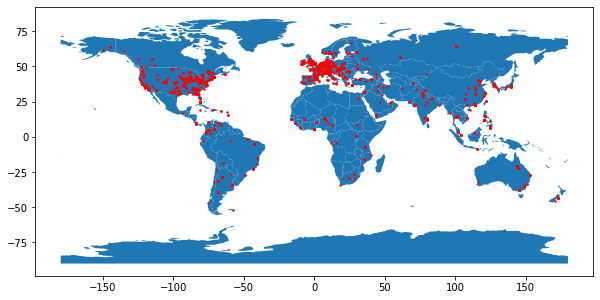

In [11]:
lat = [item for item in lat if not math.isnan(item)]
lon = [item for item in lon if not math.isnan(item)]
visfun.vis_lon_lat(longitude=lon, latitude=lat)

The above map offers an overview of the distribution of the location across the globe where research was conducted 
and resulted in a publication with the keywords "connectome" or "connectomics" in the last year. 

Visualize top 10 of affiliations with the max publications, after the merge of nr of publications between affiliations
that exceed a string similarity threshold

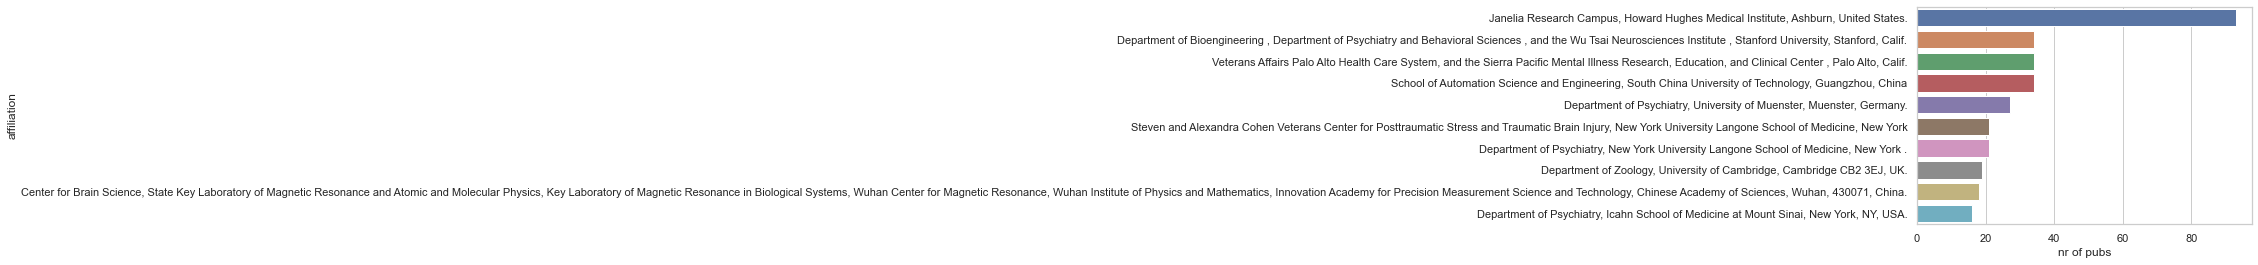

In [14]:
(affiliations_nrpubs_topmerged, 
 _) = txtmetrics.add_by_similarity(occurences, 
                                   topN = 10, 
                                   look_ahead = 100,
                                   threshold = 0.8
                                  )
                                                     
visfun.visualize_counter_selection(affiliations_nrpubs_topmerged)